## SPOTIFY ANALYSIS

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.


* *track_name*: Name of the song

* *artist(s)_name*: Name of the artist(s) of the song

* *artist_count*: Number of artists contributing to the song

* *released_year*: Year when the song was released

* *released_month*: Month when the song was released

* *released_day*: Day of the month when the song was released

* *in_spotify_playlists*: Number of Spotify playlists the song is included in

* *in_spotify_charts*: Presence and rank of the song on Spotify charts

* *streams*: Total number of streams on Spotify

* *in_apple_playlists*: Number of Apple Music playlists the song is included in

* *in_apple_charts*: Presence and rank of the song on Apple Music charts

* *in_deezer_playlists*: Number of Deezer playlists the song is included in

* *in_deezer_charts*: Presence and rank of the song on Deezer charts

* *in_shazam_charts*: Presence and rank of the song on Shazam charts

* *bpm*: Beats per minute, a measure of song tempo

* *key*: Key of the song

* *mode*: Mode of the song (major or minor)

* *danceability_%*: Percentage indicating how suitable the song is for dancing

* *valence_%*: Positivity of the song's musical content

* *energy_%*: Perceived energy level of the song

* *acousticness_%*: Amount of acoustic sound in the song

* *instrumentalness_%*: Amount of instrumental content in the song

* *liveness_%*: Presence of live performance elements

* *speechiness_%*: Amount of spoken words in the song

In [708]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

df_org=pd.read_csv("spt.csv",encoding= 'unicode-escape')

In [709]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Descriptive statistics of the dataframe
##### Quick overview of the distribution of the numerical data in the dataframe. This helps us in understanding key statistical measures for each column.

In [710]:
df_org.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


**Cleaning Dataset**

In [711]:
#Renaming the column name of artist

df_org = df_org.rename(columns={'artist(s)_name': 'artists'})

In [712]:
# Find the unique values in key

df2=df_org["key"]
df2.unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [713]:
# Checking if there are any duplicate rows

print("Number of duplicate rows: ", df_org.duplicated().sum())

Number of duplicate rows:  0


### Finding number of NULL values in each column and corresponding percentage.

In [714]:
df_null = pd.DataFrame(columns=['Total Null Values', 'Null Percentage'])
df_null['Total Null Values']=df_org.isnull().sum()
df_null['Null Percentage']=(df_org.isnull().sum() / len(df_org)) * 100
df_null

,Total Null Values,Null Percentage
track_name,0,0.00000
artists,0,0.00000
artist_count,0,0.00000
released_year,0,0.00000
released_month,0,0.00000
released_day,0,0.00000
in_spotify_playlists,0,0.00000
in_spotify_charts,0,0.00000
streams,0,0.00000
in_apple_playlists,0,0.00000


The columns 'in_shazam_charts' and 'key' have NULL values.

### Finding rows with null value in 'in_shazam_charts' column

In [715]:
df_org[df_org['in_shazam_charts'].isnull()][['track_name', 'in_shazam_charts']]


,track_name,in_shazam_charts
14,As It Was,NaN
54,Another Love,NaN
55,Blinding Lights,NaN
71,Heat Waves,NaN
73,Sweater Weather,NaN
86,Someone You Loved,NaN
127,Watermelon Sugar,NaN
158,Ghost,NaN
159,Under The Influence,NaN
180,Night Changes,NaN


### Filling NULL values of 'in_shazam_charts' with mean of 'in_spotify_charts', 'in_deezer_charts', 'in_apple_charts' 

In [716]:
# Function to calculate the mean of non-null values in a row
def row_mean(row):
    non_null_values = row.dropna()
    if non_null_values.empty:
        return np.nan
    return int(non_null_values.mean())

# Applying the function to each row and filling null values in 'in_shazam_charts'
df_org['in_shazam_charts'] = df_org.apply(lambda row: row_mean(row[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']]), axis=1)
print('Number of NULL values in \'in_shazam_charts\':', df_org['in_shazam_charts'].isnull().sum())


Number of NULL values in 'in_shazam_charts': 0


Finding rows with NULL values in 'key' column

In [717]:
df_org[df_org['key'].isnull()][['track_name', 'key']]

,track_name,key
12,Flowers,NaN
17,What Was I Made For? [From The Motion Picture ...,NaN
22,I Wanna Be Yours,NaN
35,Los del Espacio,NaN
44,Barbie World (with Aqua) [From Barbie The Album],NaN
...,...,...
899,Hold Me Closer,NaN
901,After LIKE,NaN
903,B.O.T.A. (Baddest Of Them All) - Edit,NaN
938,Labyrinth,NaN


### For the null values in the key column the key of the song can be converted into integers using the standard Pitch Class Notation. The null values for the key column will have a value of -1.

| Pitch Class | Tonal Counterparts |
|-------------|---------------------|
| -1          | NULL                |
| 0           | C                   |
| 1           | C#                  |
| 2           | D                   |
| 3           | D#                  |
| 4           | E                   |
| 5           | F                   |
| 6           | F#                  |
| 7           | G                   |
| 8           | G#                  |
| 9           | A                   |
| 10          | A#                  |
| 11          | B                   |

In [718]:
# Mapping table
pitch_class_mapping = {
    np.nan:-1,
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3,
    'E': 4, 'F': 5, 'F#': 6, 'G': 7,
    'G#': 8, 'A': 9, 'A#': 10, 'B': 11
}
# Create a new column 'tonal_counterpart' based on the mapping
df_org['tonal_counterpart'] = df_org['key'].map(pitch_class_mapping)



### In 'in_deezer_playlist' (object type), there are comma values for integers greater than 999. Convert the entire column to integer

In [719]:
df_org['in_deezer_playlists'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: in_deezer_playlists
Non-Null Count  Dtype 
--------------  ----- 
953 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


### Replacing commas with blank space using regex

In [720]:
df_org['in_deezer_playlists'] = df_org['in_deezer_playlists'].str.replace(',', '', regex=True).astype('int64')

In [721]:
df_org['in_deezer_playlists'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: in_deezer_playlists
Non-Null Count  Dtype
--------------  -----
953 non-null    int64
dtypes: int64(1)
memory usage: 7.6 KB


In [722]:
#While analysing the data we found discrepancy in 'streams' column
#Checking a particular track name

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)"]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,9


In [723]:
#change the stream value of particular song which is invalid

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)", 'streams'] = 211283228

In [724]:
#Checking if change has been applied

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)"]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,211283228,16,...,A,Major,53,75,69,7,0,17,3,9


In [725]:
#Change the datatype of stream from object to int

df_org['streams']=df_org['streams'].astype('int64')
df_org['streams'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype
--------------  -----
953 non-null    int64
dtypes: int64(1)
memory usage: 7.6 KB


In [726]:
#Checking unique tracks

unique_track = df_org['track_name'].unique()
unique_track.sort()
print(unique_track)

["'Till I Collapse" '(It Goes Like) Nanana - Edit'
 '10 Things I Hate About You' '10:35' '2 Be Loved (Am I Ready)' '2055'
 '212' '25k jacket (feat. Lil Baby)' '295' '505' '69'
 'A Holly Jolly Christmas - Single Version' 'A Tale By Quincy'
 'A Tu Merced' 'A Veces (feat. Feid)' 'ALIEN SUPERSTAR' 'AM Remix'
 'AMARGURA' 'AMERICA HAS A PROBLEM (feat. Kendrick Lamar)' 'AMG'
 'ANTIFRAGILE' 'Abcdario' 'About Damn Time' 'Acapulco' 'Acrï¿½ï¿½s'
 'Adore You' 'Afraid To Feel' 'After Dark' 'After Hours' 'After LIKE'
 'Agosto' 'Aguacero' 'Agudo Mï¿½ï¿½gi' 'Ai Preto' "Ain't Shit"
 'Ainï¿½ï¿½ï¿½t Tha' 'Alien Blues'
 'All For Us - from the HBO Original Series Euphoria'
 'All I Want for Christmas Is You' 'All My Life (feat. J. Cole)'
 'All Of The Girls You Loved Before'
 'All The Way Live (Spider-Man: Across the Spider-Verse) (Metro Boomin & Future, Lil Uzi Vert)'
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)"
 'All of Me' 'Alone' 'Am I Dreaming (Metro Boomin & A$AP Rocky, Roise

In [727]:
#Checking rows with special characters

rows_with_special_characters = df_org[df_org.astype(str).apply(lambda row: any(('ý' in cell or 'ï¿' in cell) for cell in row), axis=1)]

print("Rows with special character:")
rows_with_special_characters


Rows with special character:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,F#,Major,69,82,76,6,0,6,3,6
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,B,Major,80,82,80,43,0,14,4,11
36,Frï¿½ï¿½gil (feat. Grupo Front,"Yahritza Y Su Esencia, Grupo Frontera",2,2023,4,7,672,34,188933502,19,...,F#,Major,61,39,73,37,0,11,3,6
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",2,2023,5,4,731,15,111947664,27,...,B,Major,86,59,96,50,1,9,5,11
63,BESO,"Rauw Alejandro, ROSALï¿½",2,2023,3,24,4053,50,357925728,82,...,F,Minor,77,53,64,74,0,17,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,ALIEN SUPERSTAR,Beyoncï¿,1,2022,7,29,2688,0,171788484,39,...,A#,Minor,55,46,64,0,0,17,10,10
913,XQ Te Pones Asï¿,"Yandel, Feid",2,2022,9,13,308,0,47093942,6,...,A#,Major,81,48,70,13,0,15,7,10
915,Sin Seï¿½ï,"Ovy On The Drums, Quevedo",2,2022,7,22,1097,2,209106362,18,...,B,Minor,82,75,85,33,1,11,4,11
918,THE LONELIEST,Mï¿½ï¿½ne,1,2022,10,7,1585,5,225093344,78,...,D,Major,52,24,60,0,0,8,3,2


In [728]:
#Changing the track name where there are special unreadable characters

characters_to_replace = ['ý', 'ï', '¿', 'Â', '½', 'Ã', '¯']

for char in characters_to_replace:
    df_org['track_name'] = df_org['track_name'].str.replace(char, '')

df_org.head(10)


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,11
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,9
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,9
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,1
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,5
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,5
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,1
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,2


In [729]:
#Checking rows where track_name is empty or NULL

null_track_name_rows = df_org[df_org['track_name'].isnull() | (df_org['track_name'] == '')]
print("Rows with NULL or empty track_name:")
null_track_name_rows

Rows with NULL or empty track_name:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
174,,YOASOBI,1,2023,4,12,356,16,143573775,35,...,C#,Major,57,84,94,11,0,37,9,1
374,,Fujii Kaze,1,2020,5,20,685,14,403097450,24,...,F#,Minor,60,52,76,17,0,19,5,6


In [730]:
#Manually changing the track name

df_org.loc[374, 'track_name'] = 'Shinunoga E-Wa'
df_org.loc[174, 'track_name'] = 'Run Into The Night'
df_org.loc[[374, 174]]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
374,Shinunoga E-Wa,Fujii Kaze,1,2020,5,20,685,14,403097450,24,...,F#,Minor,60,52,76,17,0,19,5,6
174,Run Into The Night,YOASOBI,1,2023,4,12,356,16,143573775,35,...,C#,Major,57,84,94,11,0,37,9,1


In [731]:
#Checking artists with special characters

for char in characters_to_replace:
    char_present = df_org['artists'].str.contains(char)
    values_with_char = df_org['artists'][char_present]
    if not values_with_char.empty:
        print(f"Values with '{char}' in artist_name column:")
        print(values_with_char)

Values with 'ï' in artist_name column:
26                                   Rï¿½ï¿½ma, Selena G
63                              Rauw Alejandro, ROSALï¿½
112                            Jasiel Nuï¿½ï¿½ez, Peso P
118               Sebastian Yatra, Manuel Turizo, Beï¿½ï
146                            Bomba Estï¿½ï¿½reo, Bad B
210                                Junior H, Eden Muï¿½ï
212                                 Semicenk, Doï¿½ï¿½u 
231                                             Beyoncï¿
236                             Kendrick Lamar, Beyoncï¿
249                                 Zï¿½ï¿½ Neto & Crist
258                                 Rich The Kid, Matuï¿
278                                             ROSALï¿½
294                            Jasiel Nuï¿½ï¿½ez, Peso P
303                                  Tiï¿½ï¿½sto, Tate M
309                                   Marï¿½ï¿½lia Mendo
375                             Wisin & Yandel, ROSALï¿½
380                                             R

In [732]:
#Replacing special characters in artist name with #

for char in characters_to_replace:
    df_org['artists'] = df_org['artists'].str.replace(char, '#')

df_org.head(10)

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,11
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,9
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,9
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,1
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,5
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,5
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,1
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,2


In [733]:
#Checking if any NULL values are present

df_org.count()

track_name              953
artists                 953
artist_count            953
released_year           953
released_month          953
released_day            953
in_spotify_playlists    953
in_spotify_charts       953
streams                 953
in_apple_playlists      953
in_apple_charts         953
in_deezer_playlists     953
in_deezer_charts        953
in_shazam_charts        953
bpm                     953
key                     858
mode                    953
danceability_%          953
valence_%               953
energy_%                953
acousticness_%          953
instrumentalness_%      953
liveness_%              953
speechiness_%           953
tonal_counterpart       953
dtype: int64

In [734]:
#Fixing artists of a particular track

df_org.loc[df_org['track_name'] == "Nobody Like U - From \"Turning Red\"", 'artists']="Jordan Fisher, Josh Levi, Finneas O'Connell, 4*TOWN, Topher Ngo, Grayson Vill"
df_org.loc[df_org['track_name'] == "Nobody Like U - From \"Turning Red\""]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
759,"Nobody Like U - From ""Turning Red""","Jordan Fisher, Josh Levi, Finneas O'Connell, 4...",6,2022,2,25,918,0,120847157,34,...,A,Minor,91,73,72,13,0,9,15,9


In [735]:
print("Number of tracks: ", df_org['track_name'].count())
print("Number of unique tracks: ", len(df_org.track_name.unique()))

Number of tracks:  953
Number of unique tracks:  943


**Dealing with Duplicate Elements**

In [736]:
#Finding duplicate tracks by checking track name & artist

duplicate = df_org[df_org.duplicated(['track_name', 'artists'], keep = 'first')]
duplicate

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,C#,Major,70,57,57,9,20,11,7,1
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,G#,Major,75,53,74,2,0,11,5,8
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,A#,Minor,84,72,74,10,0,34,7,10
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,NaN,Major,56,52,64,11,0,45,7,-1


In [737]:
#Drop duplicate elements from the data

df_org.drop_duplicates(subset=['track_name', 'artists'], keep='first', inplace=True)
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,11
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,9
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,9
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,1
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,1


In [738]:
#Resetting the index

df_org.reset_index(drop=True, inplace=True)
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,tonal_counterpart
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,11
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,9
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,9
945,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,6
946,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,1
947,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,1


In [739]:
df_org.to_csv('sheet.csv')
df_copy = df_org.copy()

At this stage, the pre-processing is complete. Now we move on to identifying outliers and other analysis.

**Identifying Outliers**

In [740]:
#Removing columns with object type

columns_to_drop = ['track_name', 'artists', 'mode']
out_check = df_copy.drop(columns=columns_to_drop)

columns = out_check.columns

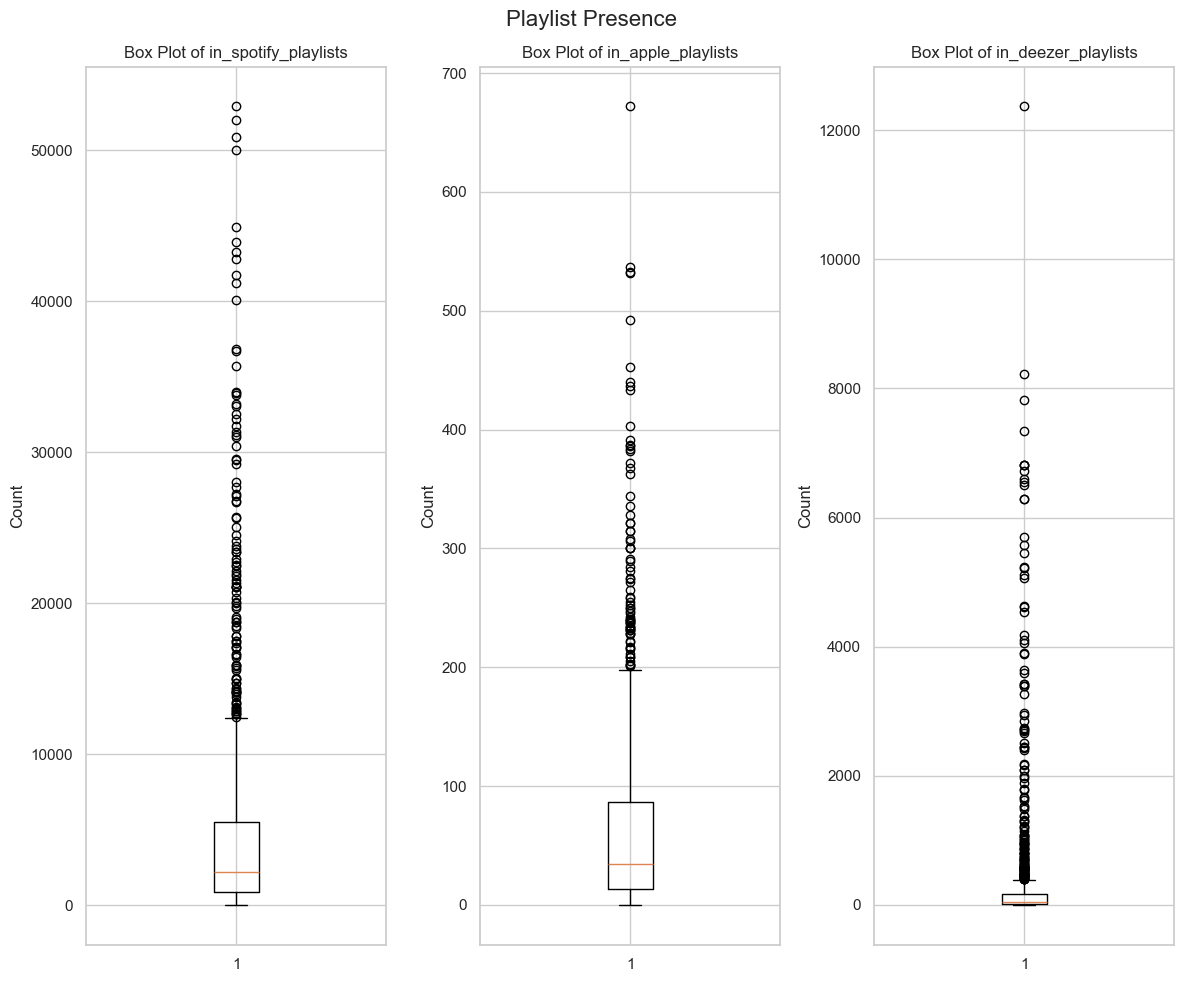

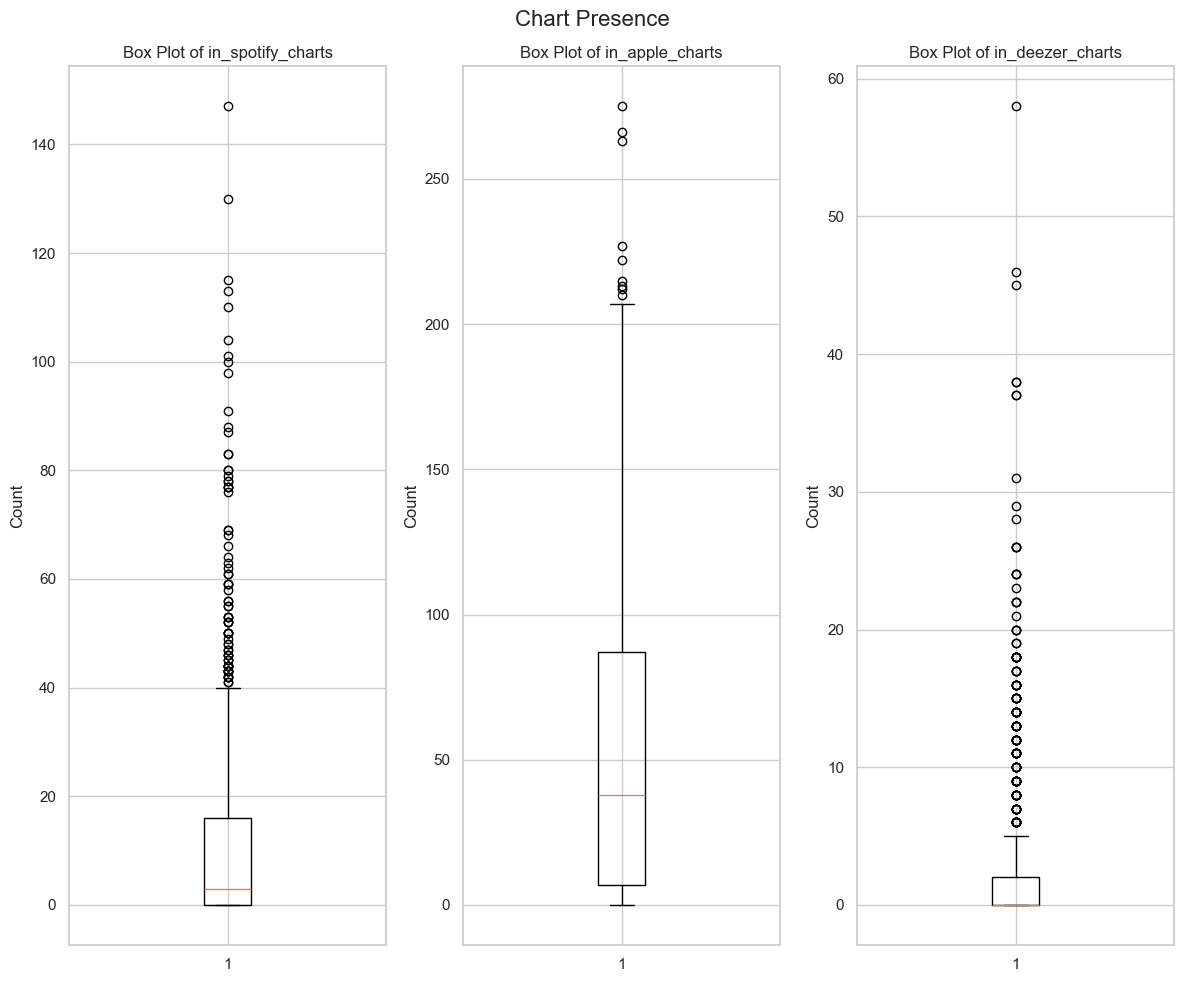

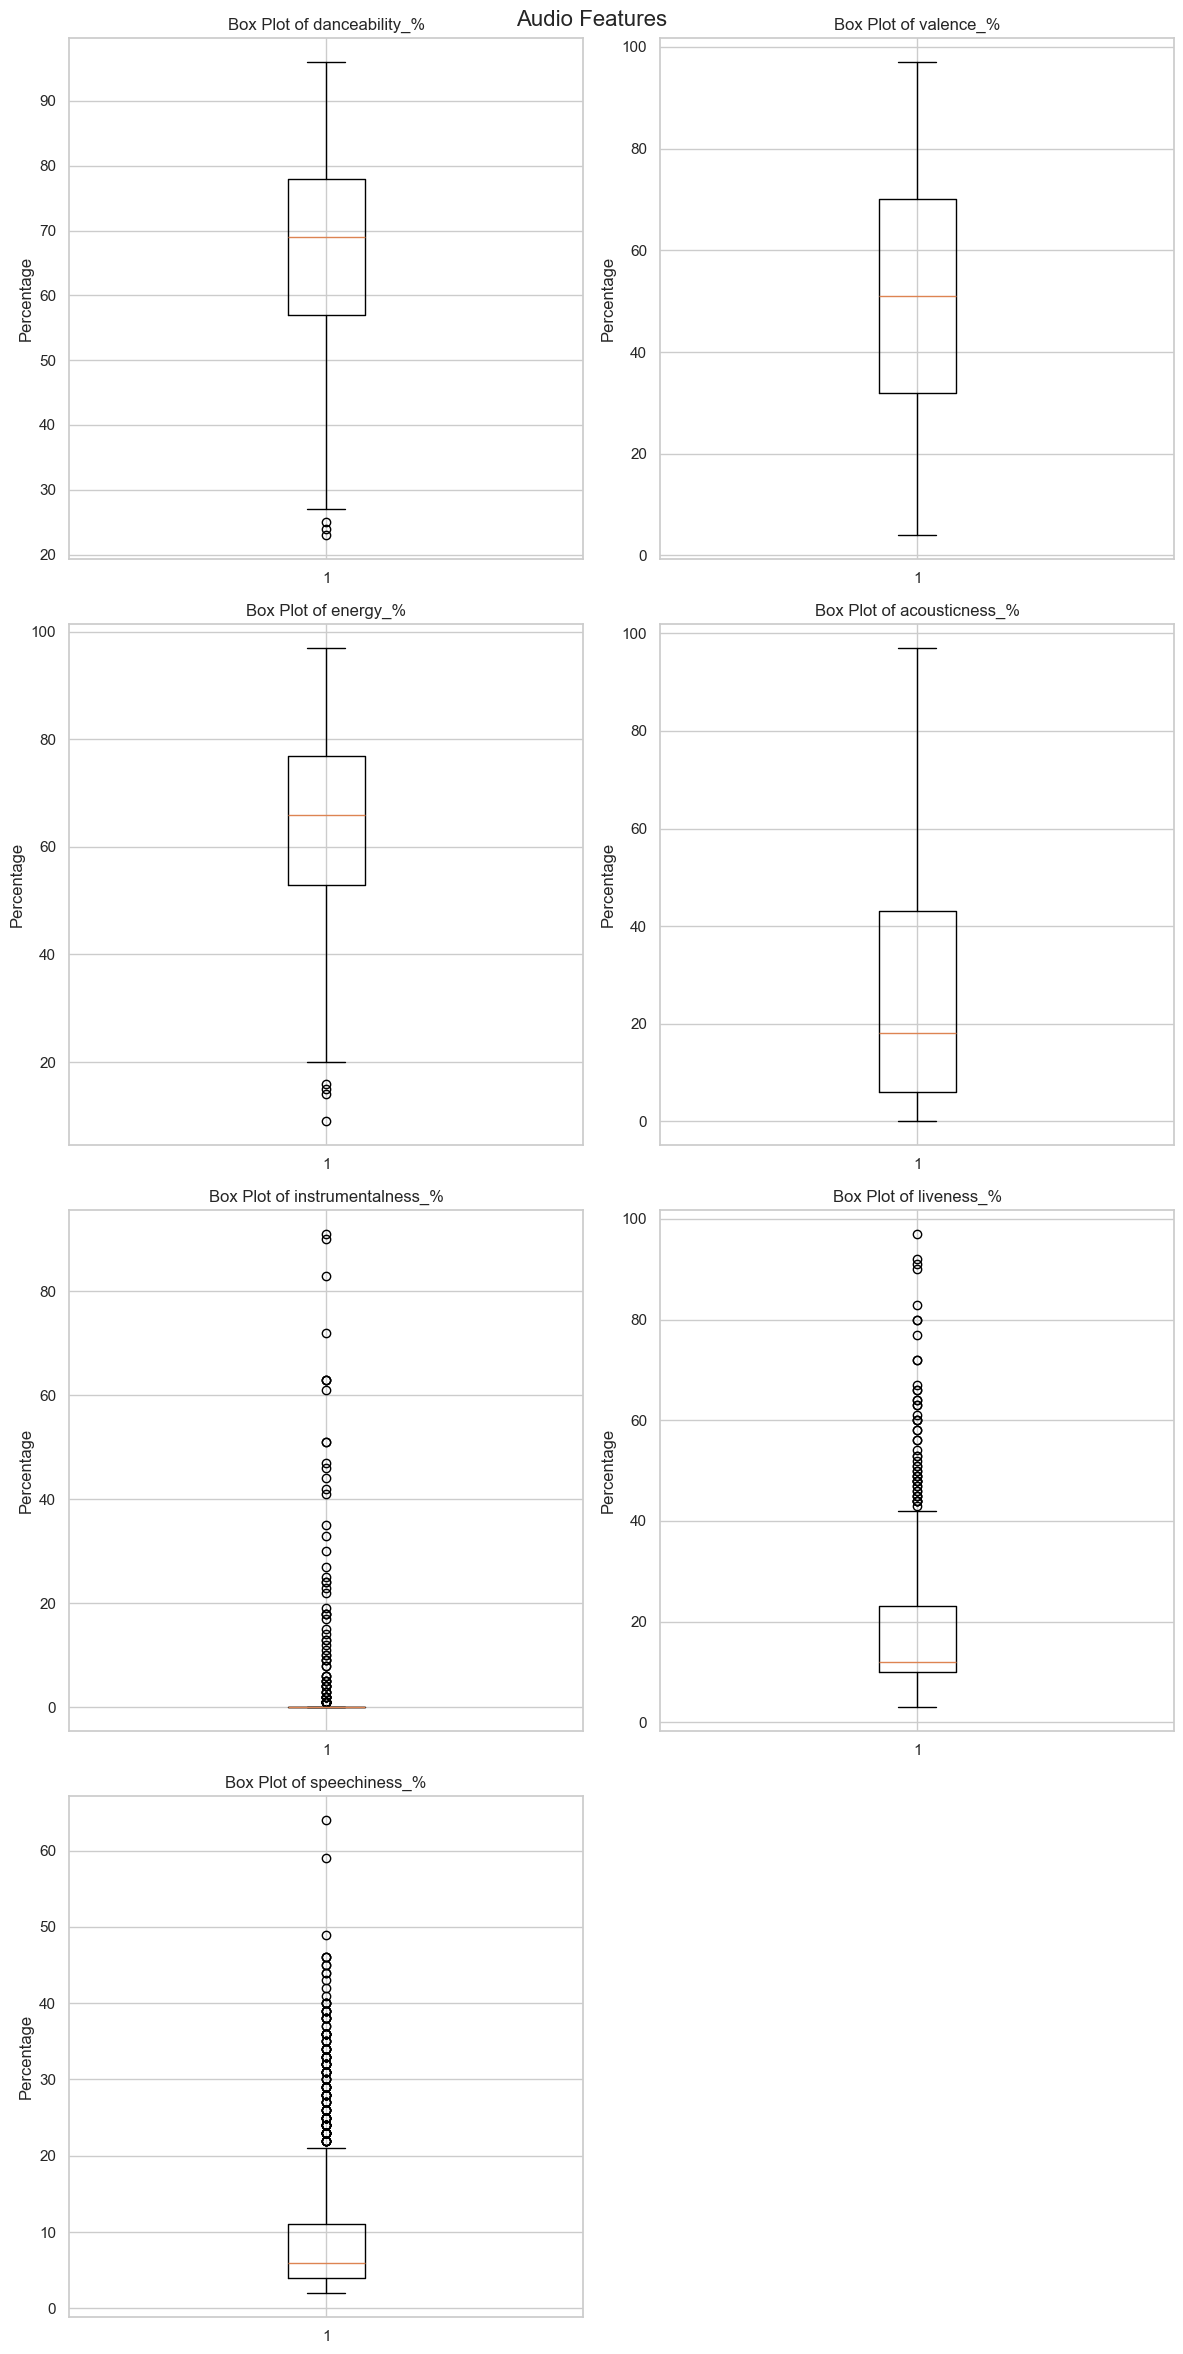

In [741]:
# Plot 1: Playlist presence

plt.figure(figsize=(12, 10))
plt.suptitle('Playlist Presence', fontsize=16)

for i, column in enumerate(['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], 1):
    plt.subplot(1, 3, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 2: Chart presence
plt.figure(figsize=(12, 10))
plt.suptitle('Chart Presence', fontsize=16)

for i, column in enumerate(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'], 1):
    plt.subplot(1, 3, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 3: Audio features
plt.figure(figsize=(12, 24))
plt.suptitle('Audio Features', fontsize=16)

audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                   'speechiness_%']

for i, column in enumerate(audio_features, 1):
    plt.subplot(4, 2, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Percentage')

plt.tight_layout()
plt.show()



Playlist Presence

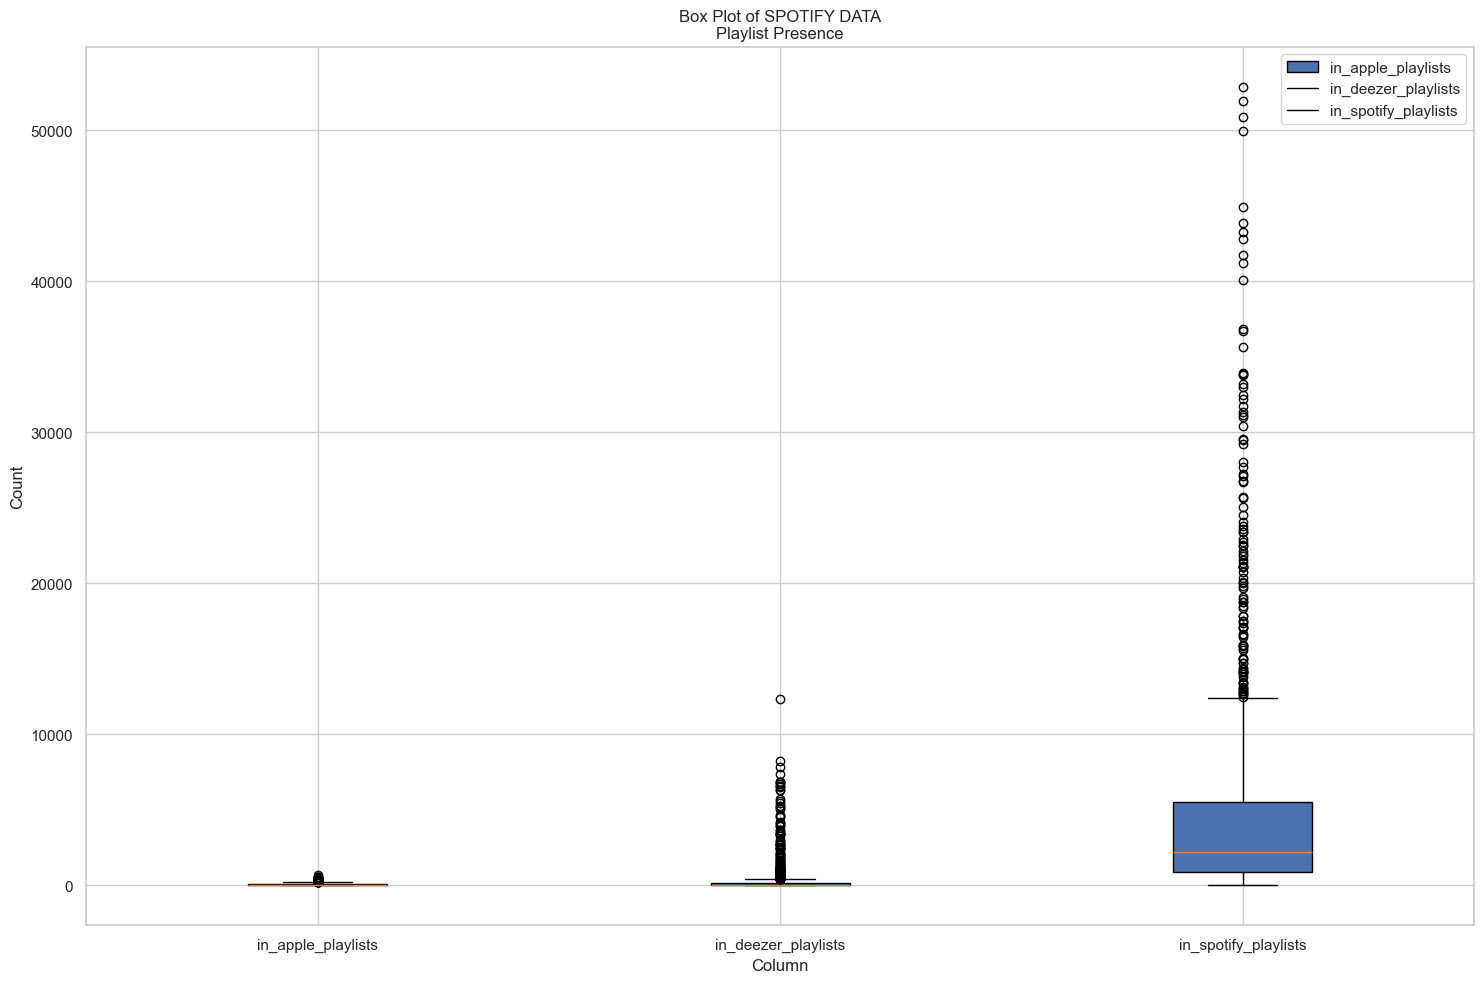

In [742]:
playList=out_check[['in_apple_playlists','in_deezer_playlists','in_spotify_playlists']]
playListColumn=playList.columns

plt.figure(figsize=(15,10))
plt.title('Box Plot of SPOTIFY DATA\nPlaylist Presence')
plt.boxplot(playList,patch_artist=True,labels=playListColumn)
plt.xlabel("Column")
plt.ylabel('Count')
plt.legend(playList)
plt.tight_layout()
plt.show()

Chart Presence

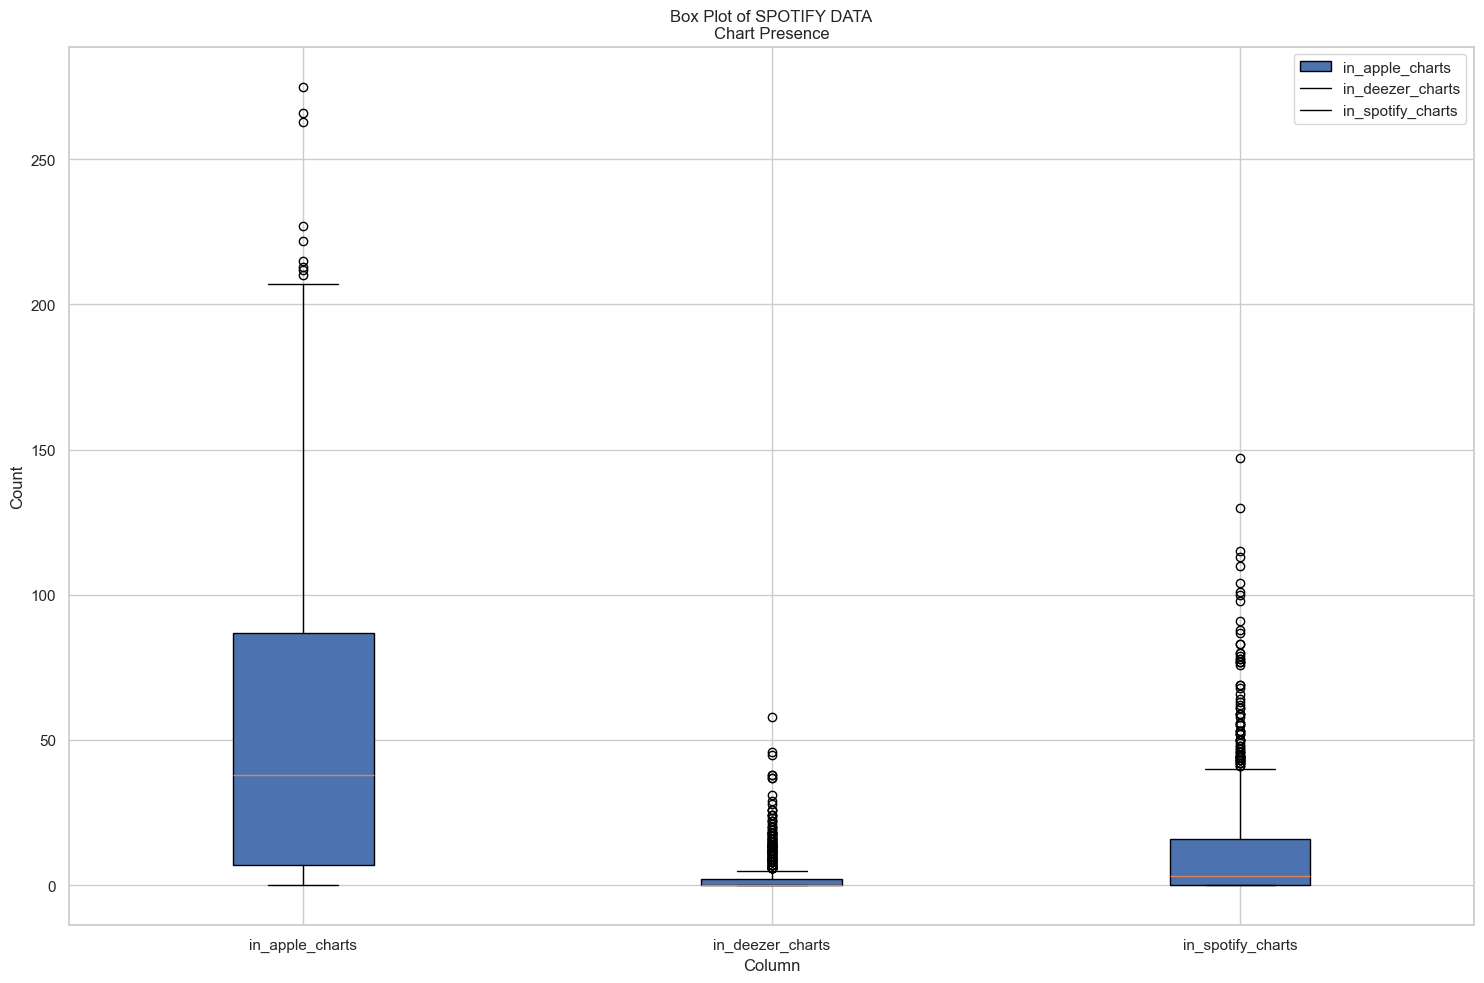

In [743]:
chartData=out_check[['in_apple_charts','in_deezer_charts','in_spotify_charts']]
chartColumn=chartData.columns

plt.figure(figsize=(15,10))
plt.title('Box Plot of SPOTIFY DATA\nChart Presence')
plt.boxplot(chartData,patch_artist=True,labels=chartColumn)
plt.xlabel("Column")
plt.ylabel('Count')
plt.legend(chartData)
plt.tight_layout()
plt.show()

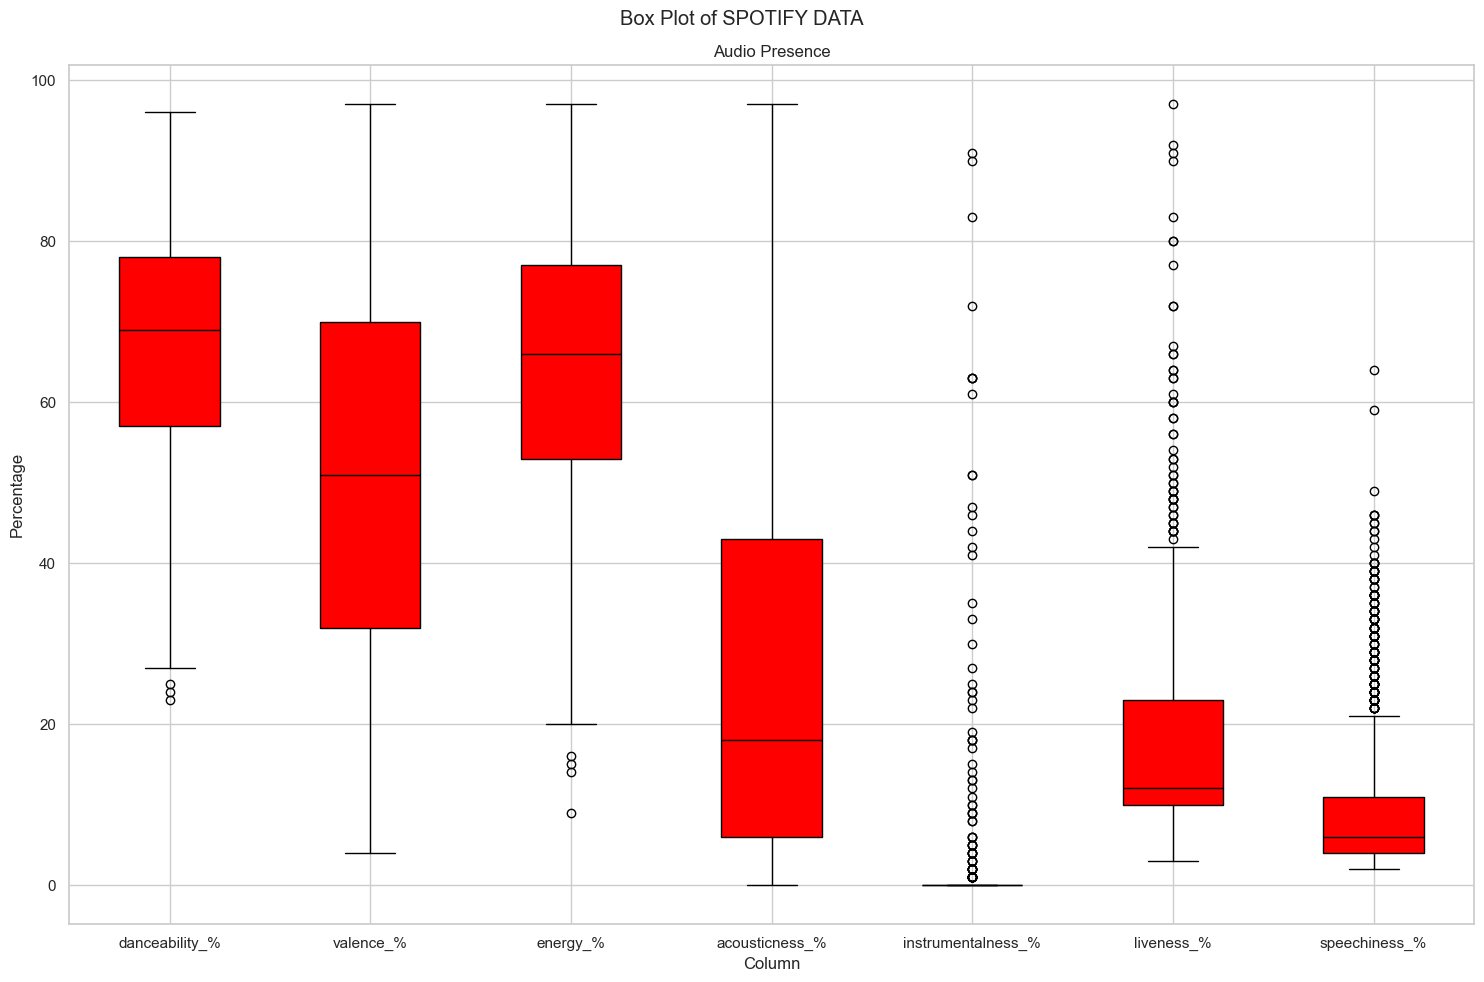

In [744]:
audioData=out_check[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                   'speechiness_%']]
audioColumn=audioData.columns

plt.figure(figsize=(15,10))
plt.suptitle('Box Plot of SPOTIFY DATA')
plt.title('Audio Presence')
plt.boxplot(audioData,patch_artist=True,labels=audioColumn, boxprops=dict(facecolor='red'), medianprops=dict(color='black'))
plt.xlabel("Column")
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

Correlation

In [745]:
columns_to_keep = df_copy.columns.difference(['track_name','artists','mode'])
df_selected = df_copy[columns_to_keep]

df_selected.corr()

ValueError: could not convert string to float: 'B'

In [746]:
#Finding high correlation

correlation_matrix = df_selected.corr()

high_correlation_matrix = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)]

high_correlations = (correlation_matrix.abs() >= 0.7) & (correlation_matrix.abs() < 1)

indices = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(correlation_matrix.shape[1]) if high_correlations.iloc[i, j]]

print("Indices of correlations greater than or equal to 0.7 or less than or equal to -0.7:")
print(indices)


ValueError: could not convert string to float: 'B'

In [ ]:
high_correlation_matrix

,acousticness_%,artist_count,bpm,danceability_%,energy_%,in_apple_charts,in_apple_playlists,in_deezer_charts,in_deezer_playlists,in_shazam_charts,in_spotify_charts,in_spotify_playlists,instrumentalness_%,liveness_%,released_day,released_month,released_year,speechiness_%,streams,valence_%
acousticness_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709049,NaN,NaN,NaN,NaN,NaN,NaN,0.774422,NaN
in_deezer_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_deezer_playlists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_shazam_charts,NaN,NaN,NaN,NaN,NaN,0.955231,NaN,NaN,NaN,NaN,0.766649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


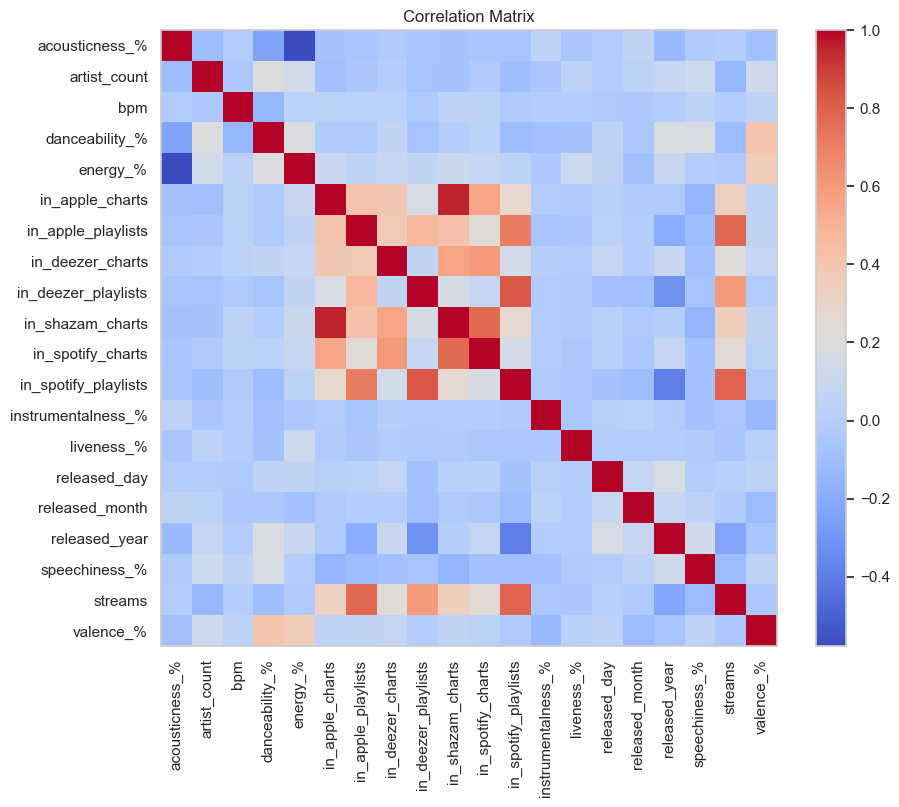

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.grid(False)
plt.show()

## Queries

Query 1: What are the top 10 danceability songs released in 2023?


In [ ]:
top_danceability_songs_2023 = df_copy[df_copy['released_year'] == 2023].nlargest(10, 'danceability_%')
top_danceability_songs_2023[['track_name', 'artists', 'danceability_%']]

,track_name,artists,danceability_%
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",93
266,Shorty Party,"Cartel De Santa, La Kelly",93
5,Sprinter,"Dave, Central Cee",92
52,AMARGURA,Karol G,92
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",92
241,Cupido,Tini,91
272,Princess Diana (with Nicki Minaj),"Nicki Minaj, Ice Spice",90
315,If We Ever Broke Up,Mae Stephens,90
205,S-Class,Stray Kids,89
18,Classy 101,"Feid, Young Miko",86


Query 2: Density Distribution of Release Date of Songs

In [ ]:
df_with_datetime = df_copy.copy()

df_with_datetime['release_date'] = pd.to_datetime(df_with_datetime[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1), errors='coerce')

df_with_datetime[['track_name','release_date']]

,track_name,release_date
0,Seven (feat. Latto) (Explicit Ver.),2023-07-14
1,LALA,2023-03-23
2,vampire,2023-06-30
3,Cruel Summer,2019-08-23
4,WHERE SHE GOES,2023-05-18
...,...,...
944,My Mind & Me,2022-11-03
945,Bigger Than The Whole Sky,2022-10-21
946,A Veces (feat. Feid),2022-11-03
947,En La De Ella,2022-10-20


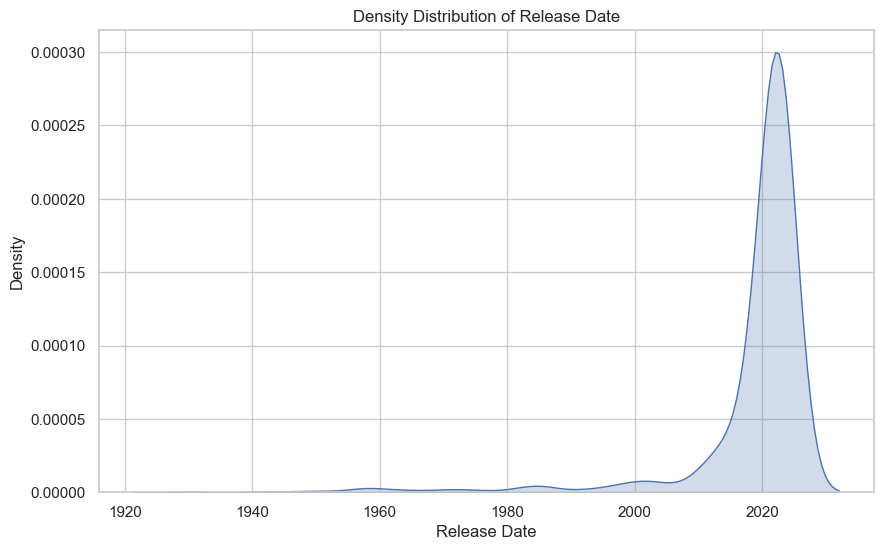

In [ ]:
#Kernel Density Estimate

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(df_with_datetime['release_date'], fill=True)

plt.xlabel('Release Date')
plt.ylabel('Density')
plt.title('Density Distribution of Release Date')

plt.show()

### Splitting the track for multiple artist

In [ ]:
df_split_artists = df_copy.assign(artists=df_copy['artists'].str.split(',')).explode('artists')
df_split_artists = df_split_artists.drop_duplicates(subset=['artists', 'track_name'])
df_split_artists = df_split_artists.apply(lambda x: x.str.strip() if x.dtype == "O" else x)
df_split_artists.reset_index(drop=True, inplace=True)
df_split_artists.to_csv('artist_split.csv')
df_split_artists

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,140,125,Major,80,89,83,31,0,8,4
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,140,125,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,62,92,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,111,138,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,106,170,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
1473,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,8,97,Major,82,67,77,8,0,12,5
1474,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,8,97,Major,82,67,77,8,0,12,5
1475,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,8,97,Major,82,67,77,8,0,12,5


Query 3: Most Streamed Artists of 2023

In [ ]:
artist_streams = df_split_artists.groupby('artists')['streams'].sum()
artist_streams = artist_streams.sort_values(ascending=False)
df_artist_streams = pd.DataFrame(artist_streams)
df_artist_streams

,streams
artists,
Bad Bunny,23813527270
The Weeknd,23497058423
Ed Sheeran,15316587718
Taylor Swift,14630378183
Harry Styles,11608645649
...,...
Toian,32761689
Beam,32761689
DJ 900,11956641


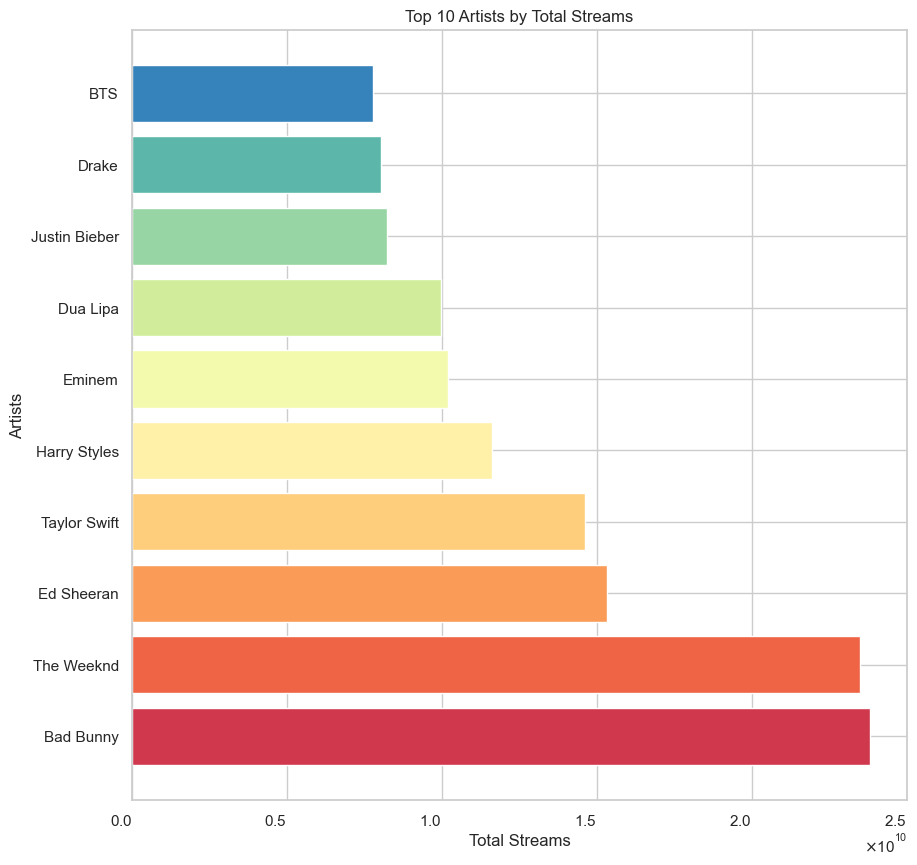

In [ ]:
plt.figure(figsize=(10,10))
data = df_artist_streams.head(10)

colors = sns.color_palette("Spectral", n_colors=10)

plt.barh(data.index, data['streams'], color = colors)

plt.xticks(ha='right')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


plt.ylabel('Artists')
plt.xlabel('Total Streams')
plt.title('Top 10 Artists by Total Streams')

plt.show()

Query 4: Artists present in most playlists

In [ ]:
artist_playlists = df_split_artists.groupby('artists')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum()

artist_playlists = artist_playlists.sum(axis=1).sort_values(ascending=False)

df_artist_playlists = pd.DataFrame({'Total_Playlists': artist_playlists})
df_artist_playlists

,Total_Playlists
artists,
The Weeknd,241666
Eminem,180355
Ed Sheeran,162567
Taylor Swift,142855
Bad Bunny,142461
...,...
Sukriti Kakar,153
Mahalini,138
Colde,115


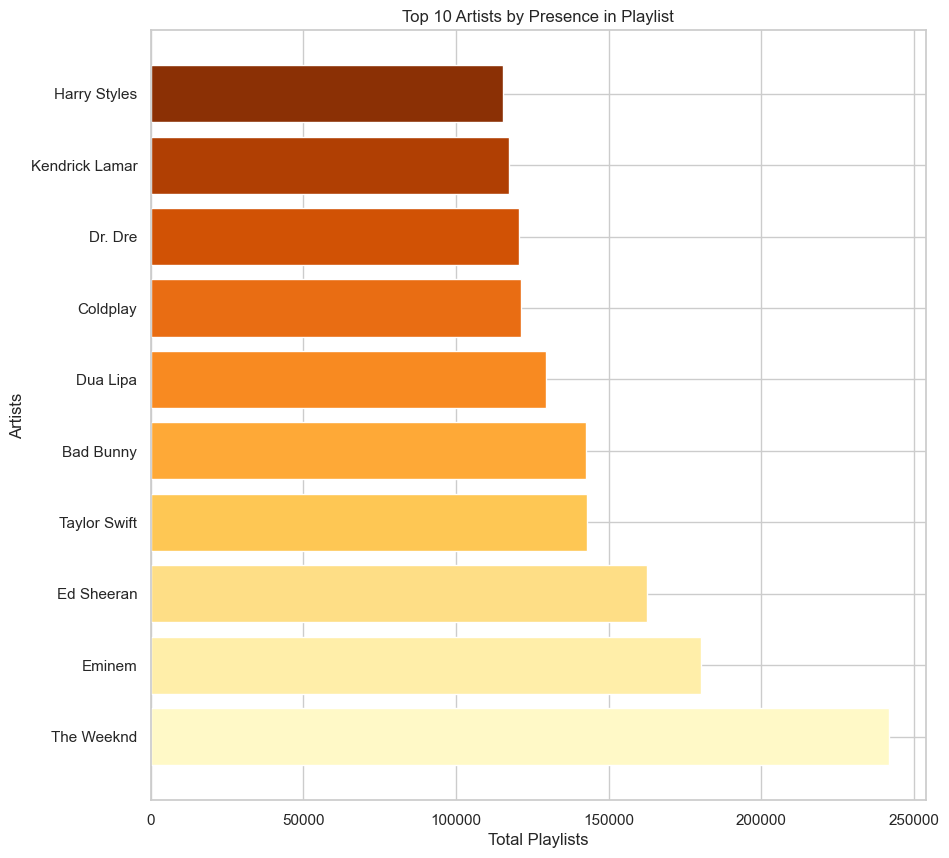

In [ ]:
plt.figure(figsize=(10, 10))

colors = sns.color_palette("YlOrBr", n_colors=10)

data = df_artist_playlists.head(10)

plt.barh(data.index, data['Total_Playlists'], color = colors)
plt.xlabel('Total Playlists')
plt.ylabel('Artists')
plt.title('Top 10 Artists by Presence in Playlist')
plt.show()


Query 5: Average Attributes of Songs of Top 15 Artists

In [ ]:
top_artists = list(df_artist_streams.reset_index().nlargest(15, 'streams')['artists'])

artists_data = df_split_artists[df_split_artists['artists'].isin(top_artists)].copy()
artists_data['artists'] = pd.Categorical(artists_data['artists'], categories=top_artists, ordered=True)
average_attributes = artists_data.groupby('artists')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()
average_attributes.sort_index()

/var/folders/3m/mh4t2kxd4x984px88phxf_3m0000gn/T/ipykernel_2650/3939308473.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_attributes = artists_data.groupby('artists')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()


,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artists,,,,,,,
Bad Bunny,74.425000,50.700000,69.125000,23.725000,1.575000,19.550000,11.275000
The Weeknd,59.805556,43.388889,63.444444,20.694444,1.000000,20.888889,8.166667
Ed Sheeran,71.428571,55.642857,63.142857,32.571429,0.000000,17.500000,5.142857
Taylor Swift,59.973684,34.157895,55.157895,31.473684,0.605263,16.657895,7.026316
Harry Styles,61.352941,54.000000,58.882353,42.823529,1.588235,14.294118,5.352941
Eminem,79.666667,47.222222,74.111111,6.444444,0.000000,22.555556,16.444444
Dua Lipa,75.666667,74.222222,80.333333,6.111111,0.000000,15.666667,9.000000
Justin Bieber,68.142857,57.857143,63.285714,31.285714,0.000000,21.571429,12.714286
Drake,73.684211,30.526316,54.684211,5.526316,0.105263,23.105263,19.947368


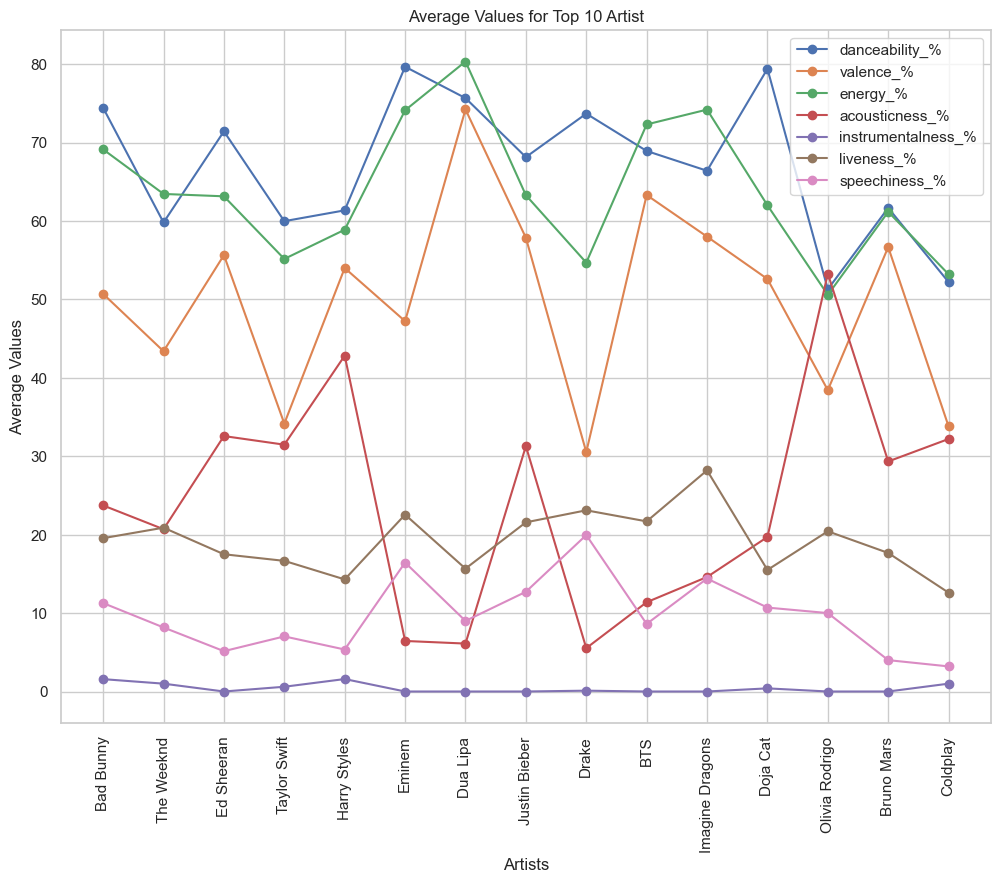

In [ ]:
average_attributes.plot(kind='line', marker='o', figsize=(12, 9))

plt.xlabel('Artists')
plt.ylabel('Average Values')
plt.title('Average Values for Top 10 Artist')
plt.xticks(rotation = 90)
plt.xticks(range(len(average_attributes.index)), average_attributes.index)

plt.show()

Query 6: Most Streamed Songs of 2023

In [ ]:
top_songs_by_streams = df_copy.nlargest(15, 'streams')
top_songs_by_streams[['track_name', 'artists', 'streams']]

,track_name,artists,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
618,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
723,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


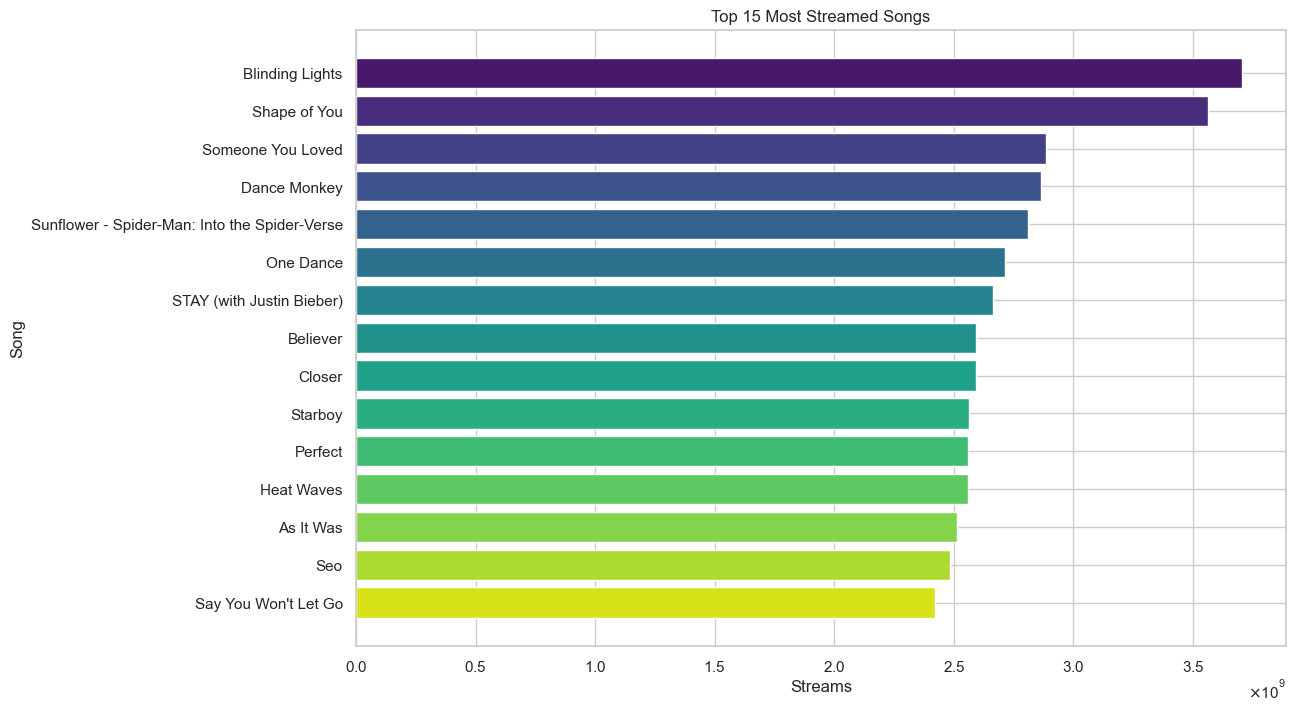

In [ ]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette("viridis", n_colors=15)

plt.barh(top_songs_by_streams['track_name'], top_songs_by_streams['streams'], color = colors)

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

plt.xlabel('Streams')
plt.ylabel('Song')
plt.title('Top 15 Most Streamed Songs')
plt.gca().invert_yaxis()
plt.show()


Query 7: Number of Songs Released by Each Artist

In [ ]:
most_songs_artists = df_split_artists['artists'].value_counts()
most_songs_artists = pd.DataFrame(most_songs_artists)
most_songs_artists


,count
artists,
Bad Bunny,40
Taylor Swift,38
The Weeknd,36
Kendrick Lamar,23
SZA,23
...,...
La Joaqui,1
Steve Aoki,1
FIFA Sound,1


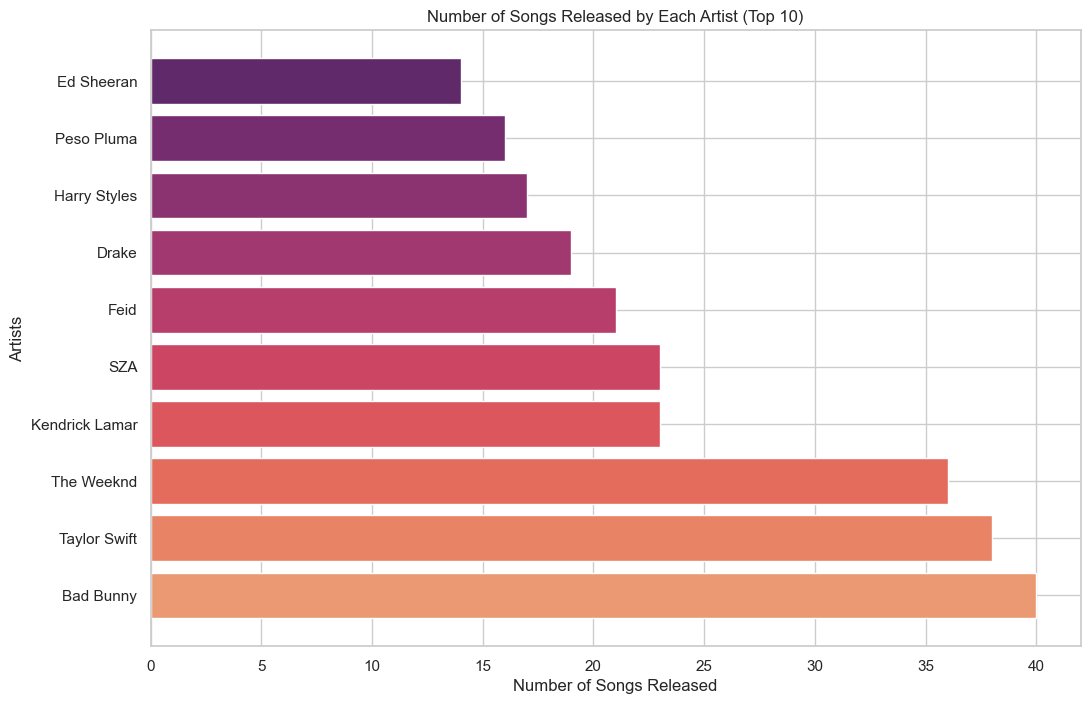

In [ ]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette("flare", n_colors=10)

data = most_songs_artists.head(10)

plt.barh(data.index, data['count'], color=colors)

plt.xlabel('Number of Songs Released')
plt.ylabel('Artists')
plt.title('Number of Songs Released by Each Artist (Top 10)')
plt.show()

Query 8: Musical Feature Evolution Over the Years

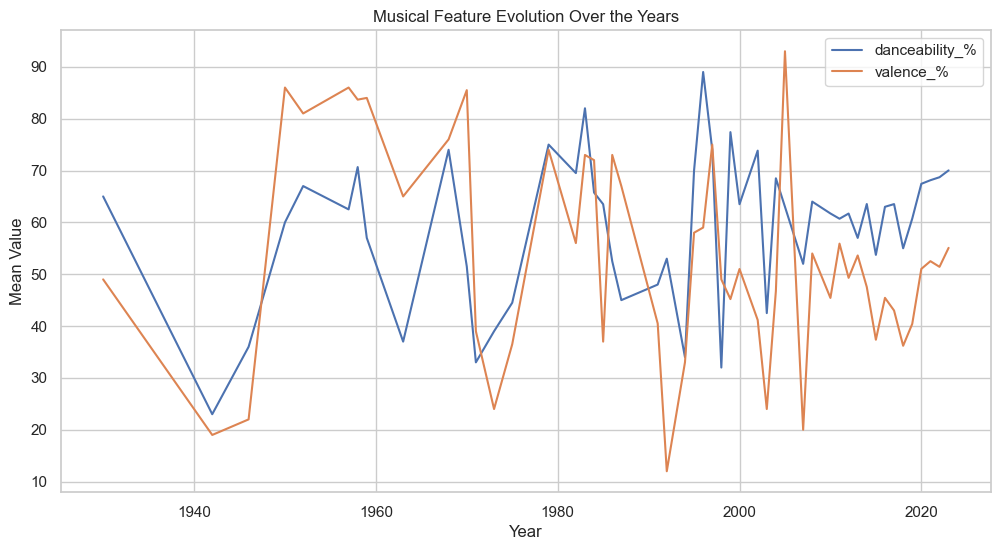

In [ ]:
features_to_analyze = ['danceability_%', 'valence_%' ]
mean_features_by_year = df_copy.groupby('released_year')[features_to_analyze].mean().reset_index()

plt.figure(figsize=(12, 6))

for feature in features_to_analyze:
    sns.lineplot(data=mean_features_by_year, x='released_year', y=feature, label=feature)

plt.title('Musical Feature Evolution Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

Query 9: Top Songs by Playlist

In [ ]:
N = 10

top_spotify_songs = df_copy.nlargest(N, 'in_spotify_playlists')
top_apple_songs = df_copy.nlargest(N, 'in_apple_playlists')
top_deezer_songs = df_copy.nlargest(N, 'in_deezer_playlists')

print("Top Spotify Songs:")
print(top_spotify_songs[['track_name', 'in_spotify_playlists']].to_string(index=False))

print("\nTop Apple Music Songs:")
print(top_apple_songs[['track_name', 'in_apple_playlists']].to_string(index=False))

print("\nTop Deezer Songs:")
print(top_deezer_songs[['track_name', 'in_deezer_playlists']].to_string(index=False))


Top Spotify Songs:
                               track_name  in_spotify_playlists
                   Get Lucky - Radio Edit                 52898
                           Mr. Brightside                 51979
                  Wake Me Up - Radio Edit                 50887
Smells Like Teen Spirit - Remastered 2021                 49991
                               Take On Me                 44927
                          Blinding Lights                 43899
                                One Dance                 43257
             Somebody That I Used To Know                 42798
        Everybody Wants To Rule The World                 41751
                      Sweet Child O' Mine                 41231

Top Apple Music Songs:
               track_name  in_apple_playlists
          Blinding Lights                 672
 One Kiss (with Dua Lipa)                 537
             Dance Monkey                 533
          Don't Start Now                 532
STAY (with Justin Biebe

Query 10: Average Audio Features for Top and Lowest 10 Songs by Streams

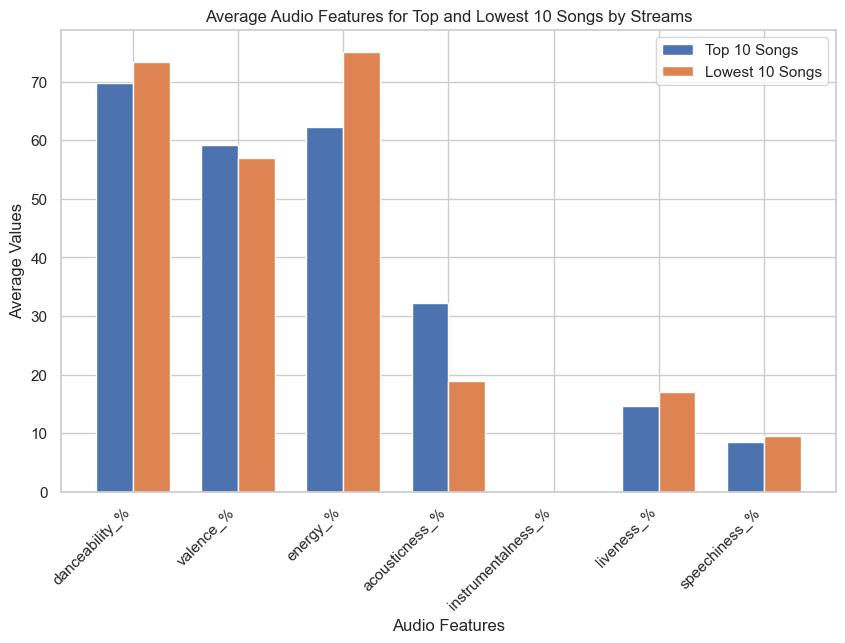

In [ ]:
top_10_songs = df_copy.nlargest(10, 'streams')
lowest_10_songs = df_copy.nsmallest(10, 'streams')

columns_to_average = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

top_10_average = top_10_songs[columns_to_average].mean()
lowest_10_average = lowest_10_songs[columns_to_average].mean()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35

bar_positions_top = range(len(top_10_average))
bar_positions_lowest = [pos + bar_width for pos in bar_positions_top]

ax.bar(bar_positions_top, top_10_average, width=bar_width, label='Top 10 Songs')
ax.bar(bar_positions_lowest, lowest_10_average, width=bar_width, label='Lowest 10 Songs')

ax.set_xlabel('Audio Features')
ax.set_ylabel('Average Values')
ax.set_title('Average Audio Features for Top and Lowest 10 Songs by Streams')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_top])
ax.set_xticklabels(columns_to_average, rotation=45, ha='right')
ax.legend()

plt.show()


Query 11: Relationship between Streams and Average Danceability

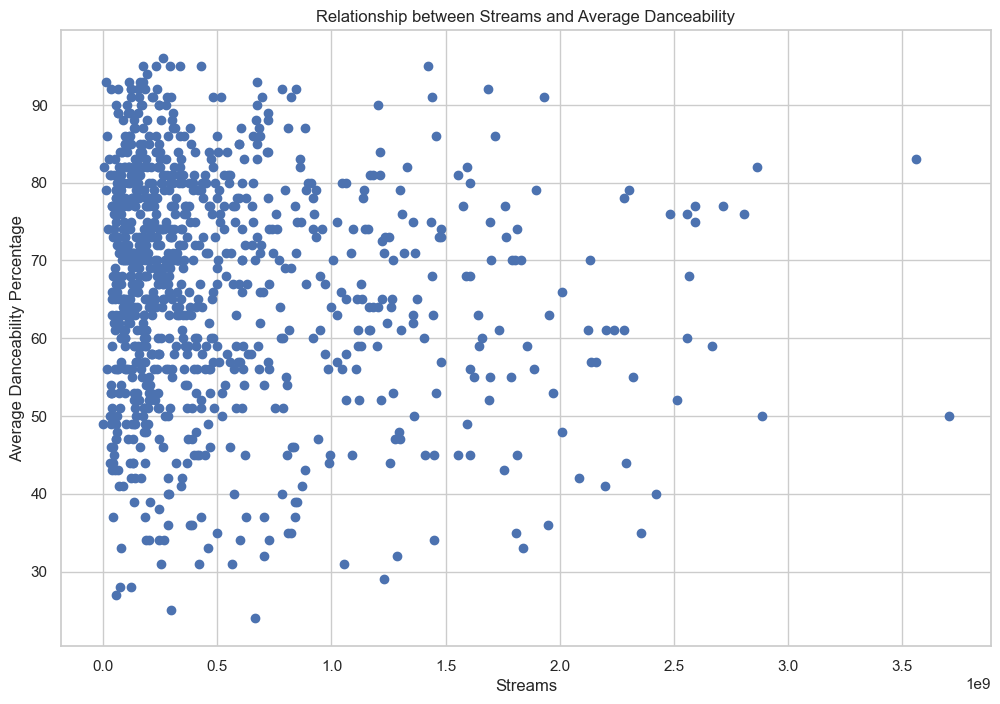

In [ ]:

# Group by streams and calculate the average danceability percentage
average_danceability = df_copy.groupby('streams')['danceability_%'].mean().reset_index()

# Plot the line plot
plt.figure(figsize=(12, 8))
plt.scatter(average_danceability['streams'], average_danceability['danceability_%'])

# Set labels and title
plt.xlabel('Streams')
plt.ylabel('Average Danceability Percentage')
plt.title('Relationship between Streams and Average Danceability')

# Show the plot
plt.show()



Query 12: Distribution of Songs by Mode

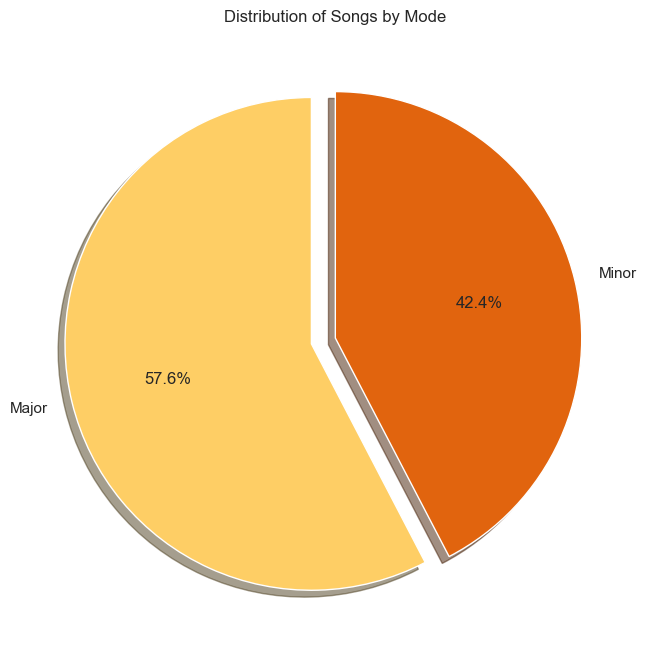

In [ ]:
# Assuming df is your DataFrame
mode_counts = df_copy['mode'].value_counts()

# Define a bright color palette
colors = sns.color_palette('YlOrBr', n_colors=len(mode_counts))

# Explode a slice to highlight
explode = [0.1] + [0] * (len(mode_counts) - 1)  # explode the first slice

# Plot a pie chart with styling
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title('Distribution of Songs by Mode')
plt.show()

Query 13: Mean Valence for Major and Minor Modes

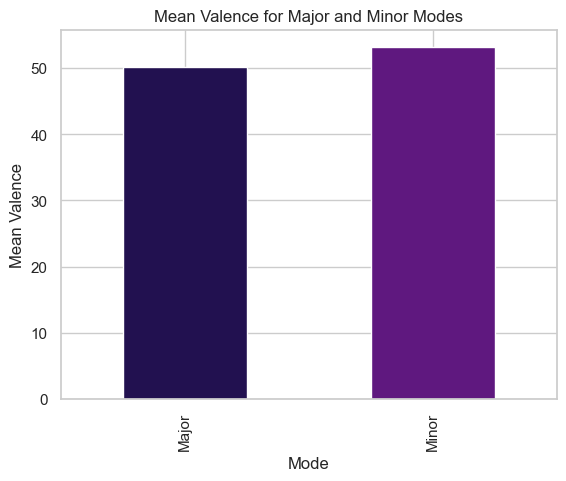

In [ ]:
mode_valence_means = df_copy.groupby('mode')['valence_%'].mean()

colors = sns.color_palette("magma")

mode_valence_means.plot(kind='bar', color = colors)

plt.xlabel('Mode')
plt.ylabel('Mean Valence')
plt.title('Mean Valence for Major and Minor Modes')

plt.show()

Query 14: Single Artist v Multiple Artists

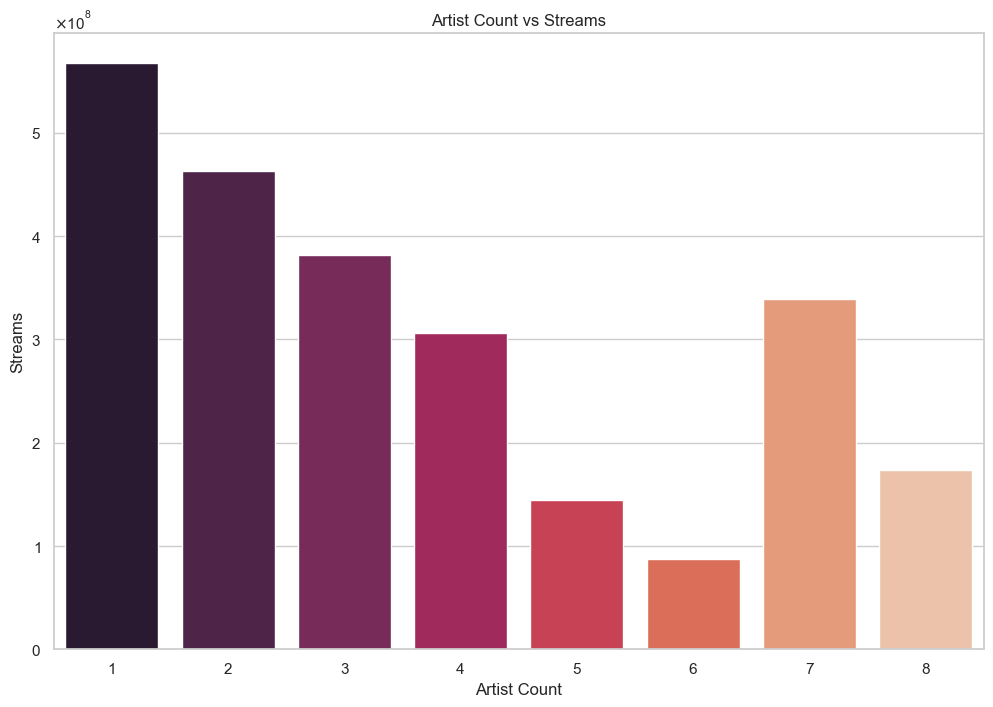

In [ ]:
df_artist_count = df_copy.groupby('artist_count')['streams'].mean().reset_index()

colors = sns.color_palette("rocket", n_colors=len(df_artist_count))


plt.figure(figsize=(12, 8))
sns.barplot(x='artist_count', y='streams', data=df_artist_count, palette=colors, hue='artist_count', legend=False)


plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.title('Artist Count vs Streams')

plt.show()

Query 15: Visualisation of Streams and Count

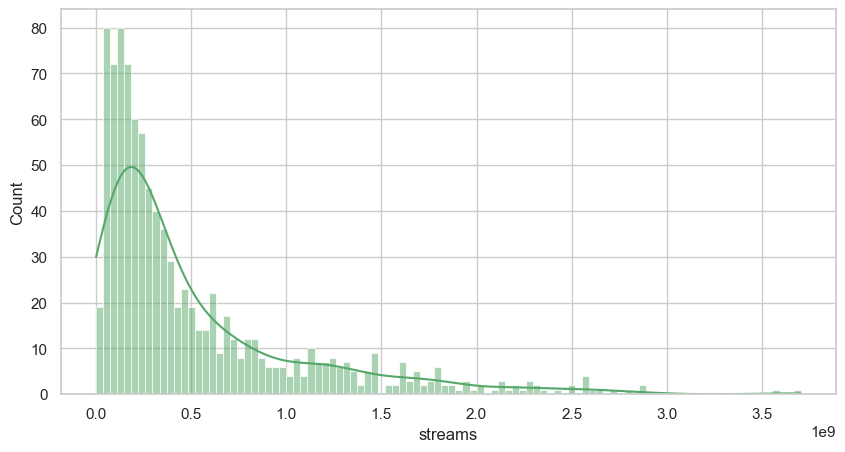

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df_copy['streams'], color='g',bins=100, kde=True)

plt.show()

Query 16 : Find the songs with the highest energy level and its corresponding BPM

Top 10 Songs with the Highest Energy Level:
                                track_name  energy_%  bpm
42                         I'm Good (Blue)        97  128
319                      Murder In My Mind        97  120
60                                       T        96  130
792  That That (prod. & feat. SUGA of BTS)        96  130
367                  Bombonzinho - Ao Vivo        95  158
174                     Run Into The Night        94  166
352                               Hype Boy        94  100
430                              KICK BACK        94  102
475                        Merry Christmas        94  114
551              Every Angel is Terrifying        94  118


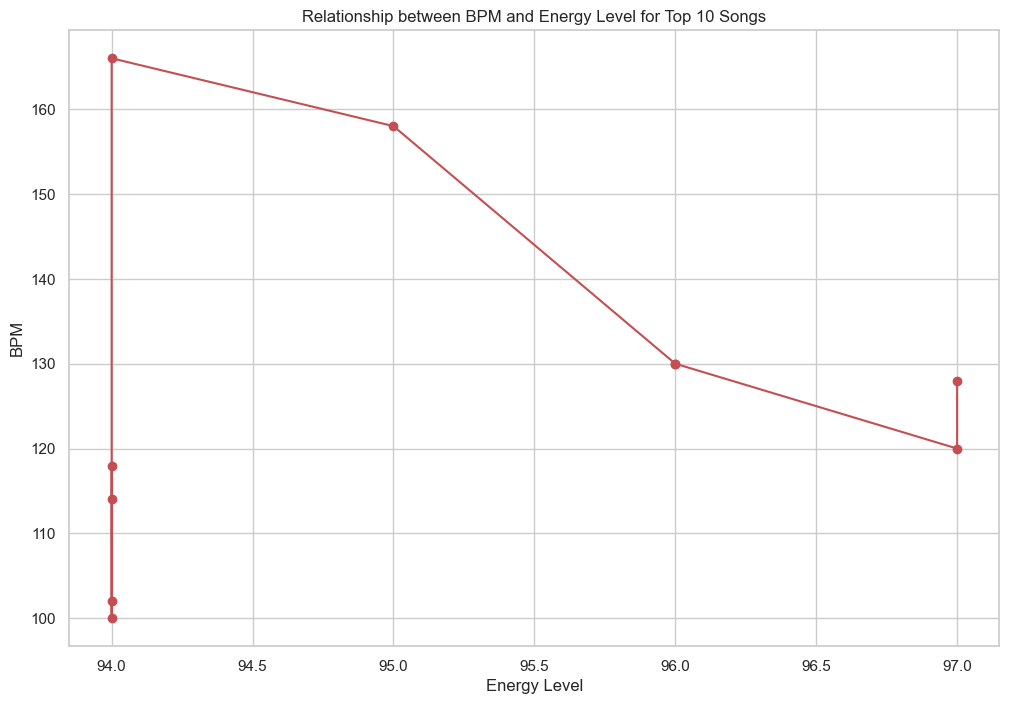


Top 10 Songs with the Highest BPM Level:
                                   track_name  bpm  energy_%
100                                     Lover  206        55
505                 We Don't Talk About Bruno  206        45
28                                 Last Night  204        68
244                         Until I Found You  202        51
447  It's the Most Wonderful Time of the Year  202        60
724                                       O.O  200        77
67                                     People  198        42
772                              La Corriente  196        79
155                   Un Finde | CROSSOVER #2  192        52
708                                     Chale  189        44


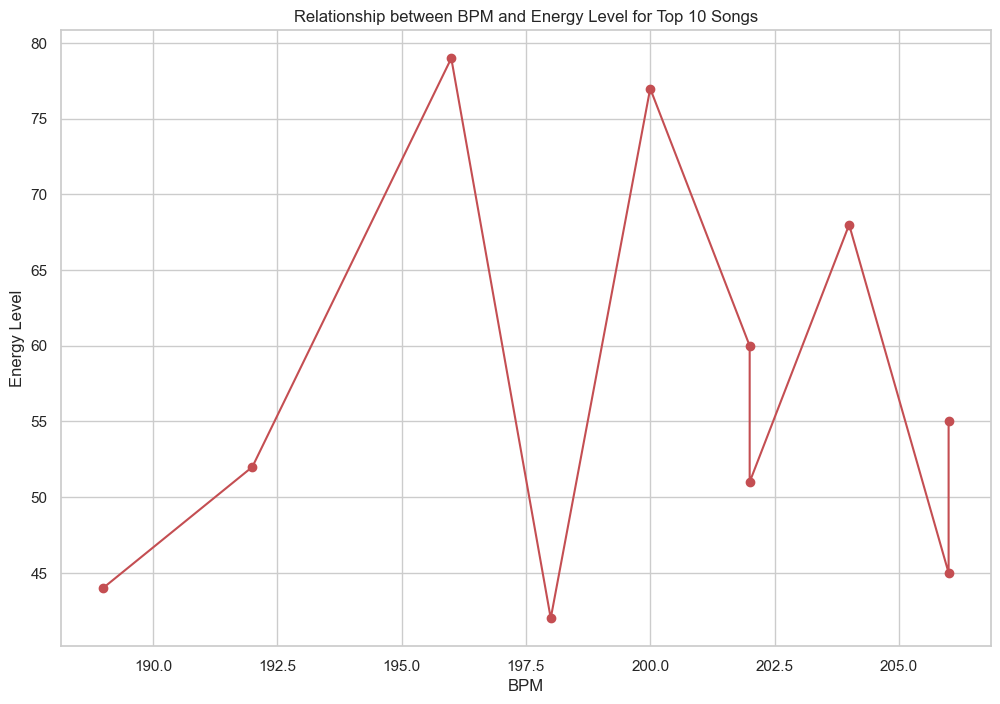

In [ ]:
# Assuming 'energy_%' and 'bpm' are the correct column names
# If the column names are different, replace them accordingly

# Convert 'energy_%' column to numeric values
df_copy['energy_%'] = pd.to_numeric(df_copy['energy_%'], errors='coerce')

# Find the top 10 songs with the highest energy level
top_10_energy_songs = df_copy.nlargest(10, 'energy_%')
top_10_bpm = df_copy.nlargest(10, 'bpm')


# Display the result
print("Top 10 Songs with the Highest Energy Level:")
print(top_10_energy_songs[['track_name', 'energy_%', 'bpm']])
plt.figure(figsize=(12,8))
plt.plot(top_10_energy_songs['energy_%'], top_10_energy_songs['bpm'], marker='o', linestyle='-', color='r')
plt.ylabel('BPM')
plt.xlabel('Energy Level')
plt.title('Relationship between BPM and Energy Level for Top 10 Songs')
plt.grid(True)
plt.show()


print("\nTop 10 Songs with the Highest BPM Level:")
print(top_10_bpm[['track_name','bpm','energy_%']])
plt.figure(figsize=(12,8))
plt.plot(top_10_bpm['bpm'], top_10_bpm['energy_%'], marker='o', linestyle='-', color='r')
plt.xlabel('BPM')
plt.ylabel('Energy Level')
plt.title('Relationship between BPM and Energy Level for Top 10 Songs')
plt.grid(True)
plt.show()







Query 17 : Identifying songs with a BPM greater than 120 and acousticness below 20%. and plot graph comparing them

             track_name  acousticness_%  bpm
2               vampire              17  138
3          Cruel Summer              11  170
4        WHERE SHE GOES              14  144
5              Sprinter              19  141
8              fukumean              12  130
..                  ...             ...  ...
931               On BS               2  158
935         Spin Bout U               1  130
939  Privileged Rappers               0  144
940       The Astronaut               0  125
941     BackOutsideBoyz               4  142

[256 rows x 3 columns]


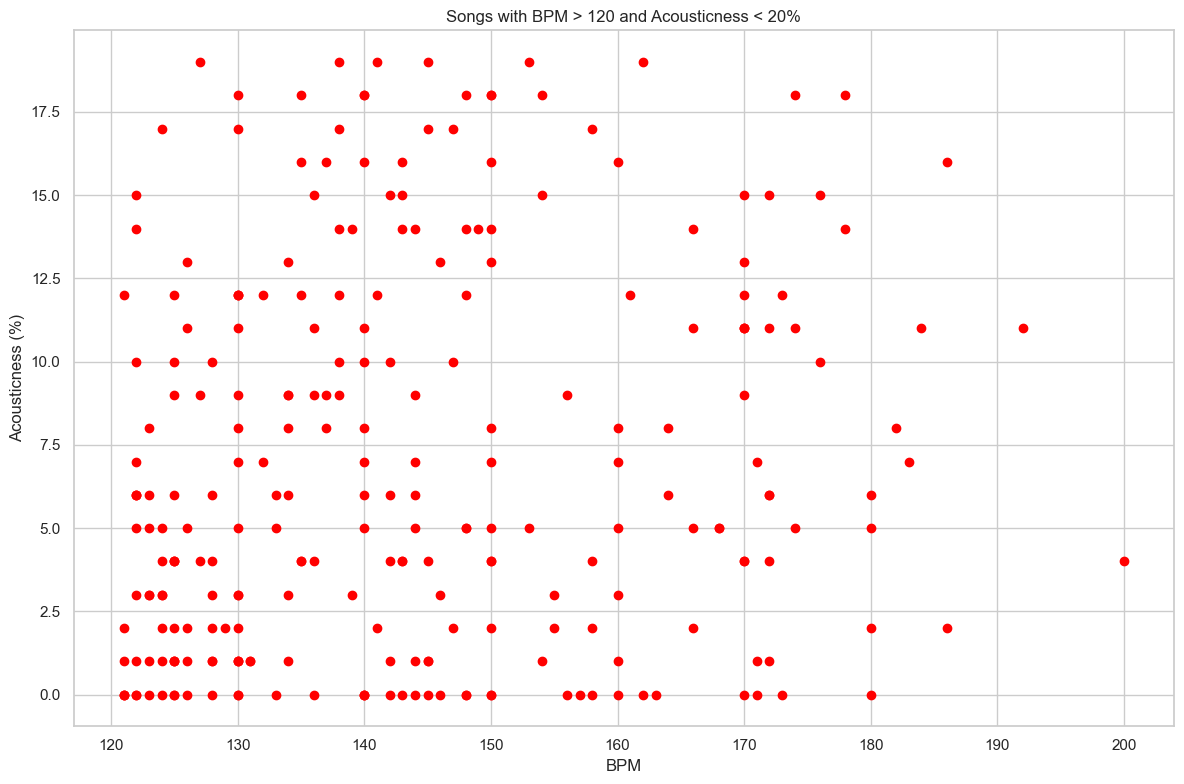

In [ ]:

# Filter songs with BPM greater than 120 and acousticness below 20%
filtered_songs = df_copy[(df_copy['bpm'] > 120) & (df_copy['acousticness_%'] < 20)]
print(filtered_songs[['track_name','acousticness_%','bpm']])
# Plot a scatter plot to compare BPM and acousticness for the selected songs
plt.figure(figsize=(12,8))
plt.scatter(filtered_songs['bpm'], filtered_songs['acousticness_%'], color='red')
plt.xlabel('BPM')
plt.ylabel('Acousticness (%)')
plt.title('Songs with BPM > 120 and Acousticness < 20%')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_copy

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,140,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,62,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,111,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,106,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,66,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,4,144,Major,60,24,39,57,0,8,3
945,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
946,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
947,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,8,97,Major,82,67,77,8,0,12,5


<function matplotlib.pyplot.show(close=None, block=None)>

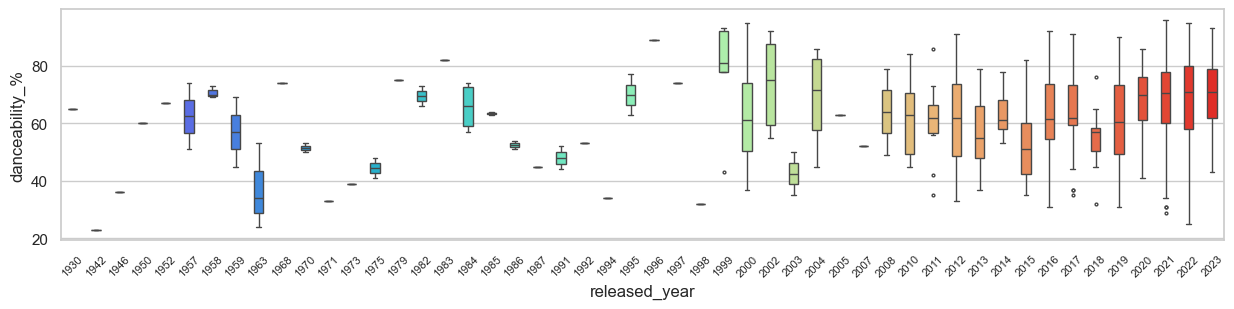

In [ ]:
plt.subplots(1,1, figsize=(15,3))
colors = sns.color_palette("rainbow",n_colors=50)
sns.boxplot(data=df_copy, x='released_year',y='danceability_%', width=0.4,fliersize=2,palette=colors ,hue='released_year',legend=False)
plt.xticks(rotation=45,fontsize=8)
plt.show

* Tracks that are released from the year 2020 to 2023 have almost similar median danceability, and almost similar interquartile range.
* Tracks that are released from 2008 to 2023 have wide range of danceability. It could be due to the majority of the top tracks were released in these years.
* The most danceable track in the top streamed songs was released in 2021.
* The least danceable track in the top streamed songs was released in 1942.

<function matplotlib.pyplot.show(close=None, block=None)>

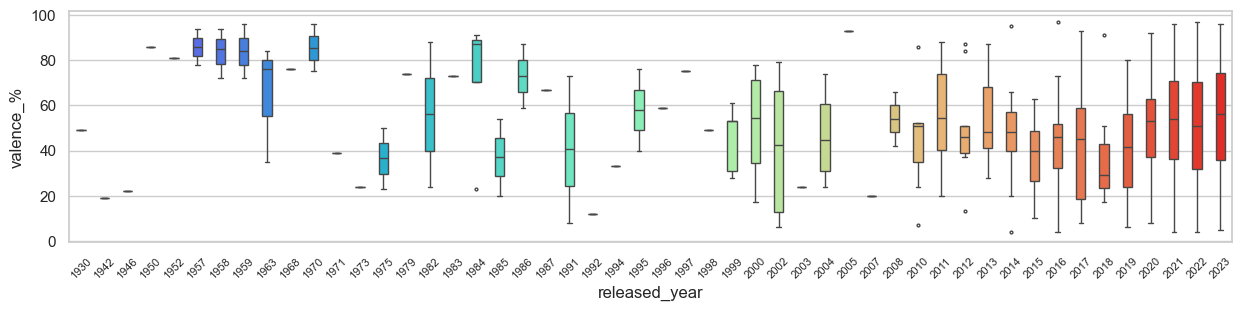

In [ ]:
plt.subplots(1,1, figsize=(15,3))
colors = sns.color_palette("rainbow",n_colors=50)
sns.boxplot(data=df_copy, x='released_year',y='valence_%', width=0.4,fliersize=2,palette=colors ,hue='released_year',legend=False)
plt.xticks(rotation=45,fontsize=8)
plt.show

* Tracks from 2020 to 2023 shows wide variety of moods in the top streamed songs, long whiskers extending from low valence to high valence, and median values at approximately 50%.
* Tracks from 2011 to 2023 has median valence at approximately 40 to 50%, with the exception of 2018. The range is also at the middle of the chart, ranging 20 to 70%, which shows the neutrality of the mood in the top streamed songs.

<function matplotlib.pyplot.show(close=None, block=None)>

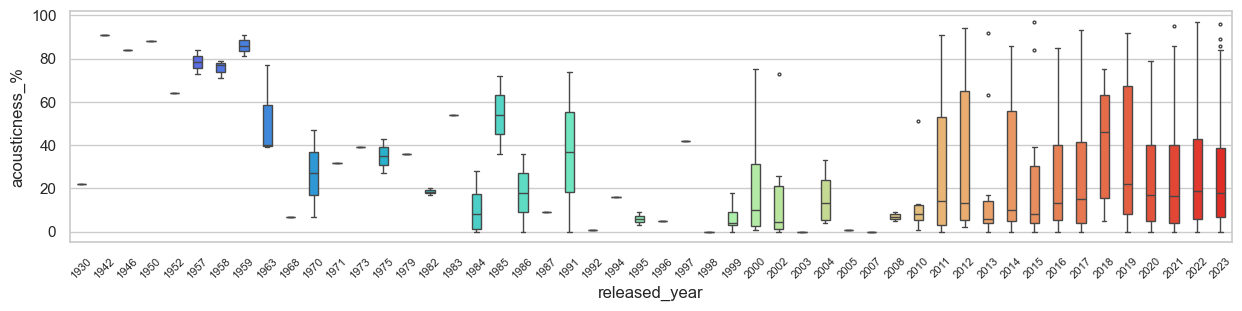

In [ ]:
plt.subplots(1,1, figsize=(15,3))
colors = sns.color_palette("rainbow",n_colors=50)
sns.boxplot(data=df_copy, x='released_year',y='acousticness_%', width=0.4,fliersize=2,palette=colors ,hue='released_year',legend=False)
plt.xticks(rotation=45,fontsize=8)
plt.show

* Tracks from 2011 to 2023 contains high variety of songs with different acousticness values, as shown in the long whiskers and long interquartile range.
* Older tracks seem to fall under a small range of acousticness levels.


<function matplotlib.pyplot.show(close=None, block=None)>

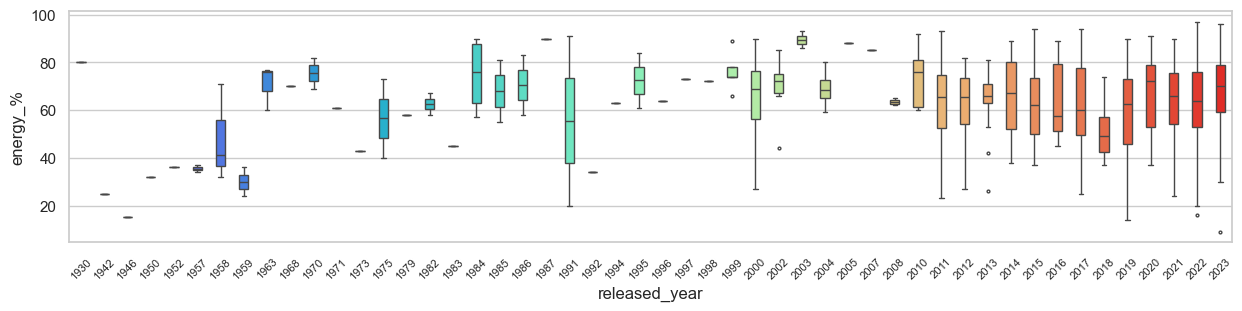

In [ ]:
plt.subplots(1,1, figsize=(15,3))
colors = sns.color_palette("rainbow",n_colors=50)
sns.boxplot(data=df_copy, x='released_year',y='energy_%', width=0.4,fliersize=2,palette=colors ,hue='released_year',legend=False)
plt.xticks(rotation=45,fontsize=8)
plt.show

* Top tracks from 2011 to 2023 contains a wide range of tracks from energetic to less energetic, but with median values at the 50 to 60% energy percentage.
* The median values of the most streamed tracks are 50% or more, with the exception of 1958, 1959, and years with single tracks that made it to the most streamed. This shows that listeners prefer to listen to energetic tracks.


In [ ]:
# # from statistics import mean

# streams_sorted = df_copy.sort_values(by='streams', ascending=False)
# df_t10=streams_sorted.head(10)
# df_l10=streams_sorted.tail(10)


# df_merge={
#      "t10_dancebilty":list(df_t10['danceability_%']),
#      "l10_dancebilty":list(df_l10['danceability_%']),
#      "t10tracks":list(df_t10['track_name']),
#      "l10tracks":list(df_l10['track_name']),
#      "t10accoust":list(df_t10['acousticness_%']),
#      "l10accoust":list(df_l10['acousticness_%']),
#      "t10en":list(df_t10['energy_%']),
#      "l10en":list(df_l10['energy_%']),
#      "t10instrumentalnes":list(df_t10['instrumentalness_%']),
#      "l10instrumentalnes":list(df_l10['instrumentalness_%']),
#      "t10valence":list(df_t10['valence_%']),
#      "l10valence":list(df_l10['valence_%']),
#      "t10liveness":list(df_t10["liveness_%"]),
#      "l10liveness":list(df_l10["liveness_%"]),
#      }

# a=df_merge["t10valence"]
# val_meant10=np.mean(a)
# print(val_meant10)

# b=df_merge["l10valence"]
# val_meanl10=np.mean(b)
# print(val_meanl10)

# dfm=pd.DataFrame(df_merge)
# dfm

# dfm.plot(kind="bar",x="t10tracks",y=["t10_dancebilty","t10accoust","t10en","t10instrumentalnes","t10valence","t10liveness"])

# dfm.plot(kind="bar",x="l10tracks",y=["l10_dancebilty","l10accoust","l10en","l10instrumentalnes","l10valence","l10liveness"])
# #x_label=['t10_valence','l10_valence']
# #dfm.plot(kind="bar",x=x_label,y=[val_meant10,val_meanl10])


# #dfm.plot(kind="line",x="t10tracks",y=["l10valence"])